# Pandas-Analytics-Project

The purpose of this project is to analyze data from three different branches of a supermaket chain in Lagos, Abuja and Port Harcourt.

# Project Steps

1.  Was to import all the required libraries. 

2. Collate necessary data from the web.

3. Combine the collated data into one dataframe, Supermarkets_Data.

4. Create another dataframe with the categorical columns.

5. Then use the df.head() to ensure that the new dataframes created are up and running. 

6. Use the .shape() function to understand the rows and column numbers contained in the dataframe and use the column_name to call the column names. 

In [1]:
import os
import io
import glob
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

# Importing and Loading the Dataset

In [2]:
# To get the URLs of the CSV files on GitHub
url = 'https://raw.githubusercontent.com/Ustacky-dev/Pandas-Analytics-Project/main/Abuja_Branch.csv'
url1 = 'https://raw.githubusercontent.com/Ustacky-dev/Pandas-Analytics-Project/main/Lagos_Branch.csv'
url2 = 'https://raw.githubusercontent.com/Ustacky-dev/Pandas-Analytics-Project/main/Port_Harcourt_Branch.csv'

# To read the CSV files from the URLs into DataFrames
Abuja_Branch_Data = pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')))
Lagos_Branch_Data = pd.read_csv(io.StringIO(requests.get(url1).content.decode('utf-8')))
PH_Branch_Data = pd.read_csv(io.StringIO(requests.get(url2).content.decode('utf-8')))

# To concatenate the DataFrames into a single DataFrame
combined_Data = pd.concat([Abuja_Branch_Data, Lagos_Branch_Data, PH_Branch_Data], axis=0, ignore_index=True)

# To display the resulting DataFrame
Supermarkets_Data = combined_Data


In [3]:
# Next, create a new DataFrame with only categorical columns for easy analysis of the categorical columns.
categorical_columns_Supermarkets_Data = Supermarkets_Data.select_dtypes(include=['category', 'object'])


# Data Exploration

1. Using the .head() to view the first view rows

2. After preparing and cleaning the data, the next step was to plot a summary of the dataframe named Supermarkets_Data.

3. Check the number of rows and columns present.

4. Generate the column names.

5. Check for missing data and values.

6. Use the .info() method to check the data.

In [4]:
Supermarkets_Data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [5]:
categorical_columns_Supermarkets_Data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,2/20/2019,13:27,Card
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,2/6/2019,18:07,Epay
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,3/9/2019,17:03,Cash
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,1/15/2019,16:19,Cash
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,3/11/2019,15:30,Epay


In [6]:
# To get the shape of the DataFrame
shape = Supermarkets_Data.shape

# To get the number of rows and columns
num_rows = shape[0]
num_columns = shape[1]

# To print the results
print(f'The data has {num_rows} rows and {num_columns} columns.')


The data has 1000 rows and 17 columns.


In [7]:
# To get the column names
column_names = Supermarkets_Data.columns

# To print the column names
print('Column names:')
for name in column_names:
    print(name)

Column names:
Invoice ID
Branch
City
Customer type
Gender
Product line
Unit price
Quantity
Tax 5%
Total
Date
Time
Payment
cogs
gross margin percentage
gross income
Rating


In [8]:
# To generate a statistical summary of the data
summary = Supermarkets_Data.describe()

# Print the summary
print(summary)

         Unit price     Quantity        Tax 5%          Total           cogs  \
count   1000.000000  1000.000000   1000.000000    1000.000000    1000.000000   
mean   20041.966800     5.510000   5536.572840  116268.029640  110731.456800   
std     9538.066205     2.923431   4215.177173   88518.720636   84303.543463   
min     3628.800000     1.000000    183.060000    3844.260000    3661.200000   
25%    11835.000000     3.000000   2132.955000   44792.055000   42659.100000   
50%    19882.800000     5.000000   4351.680000   91385.280000   87033.600000   
75%    28056.600000     8.000000   8080.290000  169686.090000  161605.800000   
max    35985.600000    10.000000  17874.000000  375354.000000  357480.000000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00   5536.572840     6.97270  
std               6.131498e-14   4215.177173     1.71858  
min               4.761905e+00    183.06000

In [9]:
Supermarkets_Data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


In [10]:
# def missing_data_summary(Supermarkets_Data):

# Calculate the total missing values in each column
total_missing = Supermarkets_Data.isnull().sum()

# Calculate the percentage of missing values in each column
percent_missing = (Supermarkets_Data.isnull().sum() / len(Supermarkets_Data)) * 100

# Create a summary dataframe
summary_Supermarkets_Data = pd.DataFrame({'Total Missing': total_missing, 'Percent Missing': percent_missing})

# Sort the summary dataframe by the total missing values in descending order
summary_Supermarkets_Data = summary_Supermarkets_Data.sort_values(by='Total Missing', ascending=False)

# Print the summary dataframe
print(summary_Supermarkets_Data)

                         Total Missing  Percent Missing
Invoice ID                           0              0.0
Total                                0              0.0
gross income                         0              0.0
gross margin percentage              0              0.0
cogs                                 0              0.0
Payment                              0              0.0
Time                                 0              0.0
Date                                 0              0.0
Tax 5%                               0              0.0
Branch                               0              0.0
Quantity                             0              0.0
Unit price                           0              0.0
Product line                         0              0.0
Gender                               0              0.0
Customer type                        0              0.0
City                                 0              0.0
Rating                               0          

### It is important to note here that there are no missing values in the dataframe.

In [11]:
# Create a boolean mask indicating which values are not missing
mask = Supermarkets_Data.notna()

# Use the mask to access the non-missing values
non_missing_values = Supermarkets_Data[mask]

# Display the result
print(non_missing_values)

      Invoice ID Branch           City Customer type  Gender  \
0    692-92-5582      B          Abuja        Member  Female   
1    351-62-0822      B          Abuja        Member  Female   
2    529-56-3974      B          Abuja        Member    Male   
3    299-46-1805      B          Abuja        Member  Female   
4    319-50-3348      B          Abuja        Normal  Female   
..           ...    ...            ...           ...     ...   
995  148-41-7930      C  Port Harcourt        Normal    Male   
996  189-40-5216      C  Port Harcourt        Normal    Male   
997  267-62-7380      C  Port Harcourt        Member    Male   
998  652-49-6720      C  Port Harcourt        Member  Female   
999  233-67-5758      C  Port Harcourt        Normal    Male   

               Product line  Unit price  Quantity    Tax 5%      Total  \
0        Food and beverages     19742.4         3   2961.36   62188.56   
1       Fashion accessories      5212.8         4   1042.56   21893.76   
2    Elec

In [12]:
Supermarkets_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# DateTime Features.

In [13]:
# Convert the date column to a datetime object
Supermarkets_Data['Date'] = pd.to_datetime(Supermarkets_Data['Date'])

# Display the result
print(Supermarkets_Data)

      Invoice ID Branch           City Customer type  Gender  \
0    692-92-5582      B          Abuja        Member  Female   
1    351-62-0822      B          Abuja        Member  Female   
2    529-56-3974      B          Abuja        Member    Male   
3    299-46-1805      B          Abuja        Member  Female   
4    319-50-3348      B          Abuja        Normal  Female   
..           ...    ...            ...           ...     ...   
995  148-41-7930      C  Port Harcourt        Normal    Male   
996  189-40-5216      C  Port Harcourt        Normal    Male   
997  267-62-7380      C  Port Harcourt        Member    Male   
998  652-49-6720      C  Port Harcourt        Member  Female   
999  233-67-5758      C  Port Harcourt        Normal    Male   

               Product line  Unit price  Quantity    Tax 5%      Total  \
0        Food and beverages     19742.4         3   2961.36   62188.56   
1       Fashion accessories      5212.8         4   1042.56   21893.76   
2    Elec

In [14]:
Supermarkets_Data['Datetime'] = pd.to_datetime(Supermarkets_Data['Date'].astype(str) + ' ' + Supermarkets_Data['Time'].astype(str))

In [15]:
Supermarkets_Data['Hour'] = pd.to_datetime(Supermarkets_Data['Time']).dt.hour
Supermarkets_Data['Day'] = pd.to_datetime(Supermarkets_Data['Date']).dt.day
Supermarkets_Data['Month'] = pd.to_datetime(Supermarkets_Data['Date']).dt.month
Supermarkets_Data['Year'] = pd.to_datetime(Supermarkets_Data['Date']).dt.year


In [16]:
# To check if the datetime syntax is valid
Supermarkets_Data.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Hour,Day,Month,Year
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,Card,59227.2,4.761905,2961.36,5.9,2019-02-20 13:27:00,13,20,2,2019
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,Epay,20851.2,4.761905,1042.56,4.5,2019-02-06 18:07:00,18,6,2,2019


# Unique Values

In [17]:
Supermarkets_Data['Hour'] = pd.to_datetime(Supermarkets_Data['Datetime']).dt.hour

# Get the number of unique hours
num_unique_hours = Supermarkets_Data['Hour'].nunique()

# Get an array of the unique hours
unique_hours_array = Supermarkets_Data['Hour'].unique()

# Print the results
print('Number of unique hours:', num_unique_hours)
print('Unique hours:', unique_hours_array)

Number of unique hours: 11
Unique hours: [13 18 17 16 15 10 12 19 14 11 20]


In [18]:
# Assuming Supermarkets_Data is a pandas DataFrame containing the 'Datetime' column
Supermarkets_Data['Hour'] = pd.to_datetime(Supermarkets_Data['Datetime']).dt.hour

# Calculate the hour with the highest activity
highest_activity_hour = Supermarkets_Data['Hour'].value_counts().idxmax()
# Calculate the count of the hour with the highest activity
highest_activity_count = Supermarkets_Data['Hour'].value_counts().max()
print(highest_activity_hour)
print(highest_activity_count)

19
113


In [19]:
# Calculate the hour with the lowest activity
lowest_activity_hour = Supermarkets_Data['Hour'].value_counts().idxmin()
# Calculate the count of the hour with the lowest activity
lowest_activity_count = Supermarkets_Data['Hour'].value_counts().min()
print(lowest_activity_hour)
print(lowest_activity_count)

17
74


In [20]:
# Get the unique sales hours
unique_hours = Supermarkets_Data['Time'].unique()

# Print the result
print(unique_hours)

['13:27' '18:07' '17:03' '16:19' '15:30' '10:40' '12:20' '15:31' '19:48'
 '19:39' '12:43' '14:49' '13:01' '18:45' '13:03' '18:00' '17:24' '15:47'
 '12:45' '14:42' '11:49' '13:40' '14:35' '15:01' '18:17' '19:56' '17:55'
 '12:09' '10:25' '18:14' '18:19' '11:32' '12:44' '12:29' '15:26' '20:38'
 '17:26' '14:57' '11:15' '13:18' '18:36' '14:40' '12:21' '15:07' '19:20'
 '19:40' '13:58' '14:43' '19:18' '15:24' '14:12' '17:34' '12:04' '19:46'
 '19:00' '10:53' '10:39' '13:41' '20:23' '11:57' '14:51' '12:42' '19:42'
 '19:17' '13:24' '15:53' '18:27' '12:58' '18:59' '13:44' '13:46' '19:14'
 '10:52' '19:28' '13:52' '10:54' '18:31' '19:26' '18:42' '19:43' '19:06'
 '15:34' '19:22' '19:24' '20:55' '18:13' '16:52' '20:52' '18:01' '13:30'
 '17:37' '11:46' '16:46' '14:04' '19:53' '10:11' '18:48' '13:02' '18:23'
 '20:21' '11:06' '19:02' '14:16' '15:40' '16:58' '19:50' '13:32' '13:19'
 '10:26' '16:28' '10:43' '19:01' '13:00' '14:29' '17:13' '13:53' '17:27'
 '14:36' '19:35' '17:58' '20:07' '11:02' '19:07' '1

In [21]:
categorical_columns_Supermarkets_Data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,2/20/2019,13:27,Card
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,2/6/2019,18:07,Epay
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,3/9/2019,17:03,Cash
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,1/15/2019,16:19,Cash
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,3/11/2019,15:30,Epay


In [22]:
# To list payment methods using the unique method
Supermarkets_Data['Payment'].unique().tolist()

['Card', 'Epay', 'Cash']

In [23]:
# Get the unique values in the 'Product line' column
Supermarkets_Data['Product line'].unique().tolist()

['Food and beverages',
 'Fashion accessories',
 'Electronic accessories',
 'Sports and travel',
 'Home and lifestyle',
 'Health and beauty']

In [24]:
# Get the unique values in the 'Product line' column
Supermarkets_Data['Gender'].unique().tolist()
gender_counts_by_payment = Supermarkets_Data.groupby('Payment')['Gender'].value_counts()
print(gender_counts_by_payment)

Payment  Gender
Card     Female    163
         Male      148
Cash     Female    178
         Male      166
Epay     Male      185
         Female    160
Name: Gender, dtype: int64


In [25]:
# Get the unique values in the 'Customer type' column
unique_values = Supermarkets_Data['Customer type'].unique()

# Print the result
print(unique_values)

['Member' 'Normal']


In [26]:
# Get the unique values in the 'Product line' column
Supermarkets_Data['City'].unique().tolist()

['Abuja', 'Lagos', 'Port Harcourt']

In [27]:
# Get the unique values in the 'Branch' column
Supermarkets_Data['Branch'].unique().tolist()

['B', 'A', 'C']

In [28]:
unique_values = Supermarkets_Data['Customer type'].unique()
print(unique_values)
value_counts = Supermarkets_Data['Payment'].value_counts()
print(value_counts)

['Member' 'Normal']
Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64


In [29]:
unique_values = Supermarkets_Data['Gender'].unique()
print(unique_values)
value_counts = Supermarkets_Data['Customer type'].value_counts()
print(value_counts)

['Female' 'Male']
Member    501
Normal    499
Name: Customer type, dtype: int64


In [30]:
unique_values = Supermarkets_Data['Gender'].unique()
print(unique_values)
value_counts = Supermarkets_Data['City'].value_counts()
print(value_counts)
unique_gender_by_city = Supermarkets_Data.groupby('City')['Gender'].unique()
print(unique_gender_by_city)
gender_counts_by_city = Supermarkets_Data.groupby('City')['Gender'].value_counts()
print(gender_counts_by_city)

['Female' 'Male']
Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64
City
Abuja            [Female, Male]
Lagos            [Female, Male]
Port Harcourt    [Female, Male]
Name: Gender, dtype: object
City           Gender
Abuja          Male      170
               Female    162
Lagos          Male      179
               Female    161
Port Harcourt  Female    178
               Male      150
Name: Gender, dtype: int64


In [31]:
unique_values = Supermarkets_Data['Rating'].unique()
print(unique_values)
value_counts = Supermarkets_Data['Branch'].value_counts()
print(value_counts)

[ 5.9  4.5  6.8  4.4  5.1  6.7  9.6  4.8  7.7  7.9  5.6  9.5  8.4  4.1
  8.1  6.5 10.   7.6  9.9  4.   6.4  6.1  8.6  7.4  8.   4.6  5.3  5.2
  4.2  7.3  7.2  7.5  8.8  8.2  6.2  9.7  6.   9.4  9.8  8.7  7.   5.7
  6.6  5.4  4.9  8.5  4.3  8.3  9.   6.3  4.7  5.5  8.9  7.8  5.8  6.9
  7.1  5.   9.2  9.1  9.3]
A    340
B    332
C    328
Name: Branch, dtype: int64


# Aggregation with GroupBy

In [32]:
# To open the categorical columns for easy access using the .head() method.
categorical_columns_Supermarkets_Data.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,2/20/2019,13:27,Card


In [33]:
# Using the groupby() to Group by item and location and calculate total sales
grouped_Supermarkets_Data = Supermarkets_Data.groupby(['Product line', 'City']).sum()

# Sort by sales in descending order
sorted_Supermarkets_Data = grouped_Supermarkets_Data.sort_values(by='Quantity', ascending=False)

# Display the result
print(sorted_Supermarkets_Data)

                                      Unit price  Quantity     Tax 5%  \
Product line           City                                             
Home and lifestyle     Lagos           1306789.2       371  384294.78   
Food and beverages     Port Harcourt   1360807.2       369  407431.80   
Fashion accessories    Port Harcourt   1397822.4       342  369601.20   
Electronic accessories Port Harcourt   1105027.2       333  325182.42   
Sports and travel      Lagos           1181163.6       333  332103.42   
                       Abuja           1332014.4       322  342654.84   
Electronic accessories Lagos           1185217.2       322  314007.66   
Health and beauty      Abuja           1110182.4       320  342525.60   
Electronic accessories Abuja            987112.8       316  292310.46   
Food and beverages     Lagos           1147867.2       313  294224.58   
Fashion accessories    Abuja           1224115.2       297  281371.14   
Home and lifestyle     Abuja            999252.0   

In [34]:
# Grouping the data by city and calculating the total gross income for each city
gross_income_by_city = Supermarkets_Data.groupby('City')['gross income'].sum()

# Displaying the results as a table
print(gross_income_by_city.to_frame())

# Determining the city with the highest total gross income
highest_gross_income_city = gross_income_by_city.idxmax()
print('City with the highest total gross income:', highest_gross_income_city)

# Port Harcourt returned the highest total gross income

               gross income
City                       
Abuja            1820531.52
Lagos            1820577.78
Port Harcourt    1895463.54
City with the highest total gross income: Port Harcourt


In [35]:
# Group the DataFrame by the column and apply the sum and mean aggregation functions
result = Supermarkets_Data.groupby('Product line').agg({'gross income': ['sum', 'mean'], 'gross margin percentage': ['sum', 'mean']})

# Print the result
print(result)

                       gross income              gross margin percentage  \
                                sum         mean                     sum   
Product line                                                               
Electronic accessories    931500.54  5479.414941              809.523810   
Fashion accessories       930958.20  5230.102247              847.619048   
Food and beverages        962483.04  5531.511724              828.571429   
Health and beauty         843321.24  5548.166053              723.809524   
Home and lifestyle        923347.08  5770.919250              761.904762   
Sports and travel         944962.74  5692.546627              790.476190   

                                  
                            mean  
Product line                      
Electronic accessories  4.761905  
Fashion accessories     4.761905  
Food and beverages      4.761905  
Health and beauty       4.761905  
Home and lifestyle      4.761905  
Sports and travel       4.761905  


In [36]:
# Calculate the total gross income for each branch
total_gross_income = Supermarkets_Data.groupby('Branch')['gross income'].sum()

# Find the branch with the highest total gross income
max_item = total_gross_income.idxmax()
max_value = total_gross_income.max()

# Create a DataFrame with the result
result = pd.DataFrame({'Branch': [max_item], 'Total Gross Income': [max_value]})

# Display the result as a table
display(result)

print(total_gross_income)

,Branch,Total Gross Income
0,C,1895463.54


Branch
A    1820577.78
B    1820531.52
C    1895463.54
Name: gross income, dtype: float64


In [37]:
# Calculate the total gross income for each product line.
total_gross_income = Supermarkets_Data.groupby('Product line')['gross income'].sum()
print(total_gross_income)

# Find the product line with the highest total gross income
max_item = total_gross_income.idxmax()
max_value = total_gross_income.max()


# Create a DataFrame with the result
result = pd.DataFrame({'Product line': [max_item], 'Total Gross Income': [max_value]})

# Display the result as a table
display(result)

Product line
Electronic accessories    931500.54
Fashion accessories       930958.20
Food and beverages        962483.04
Health and beauty         843321.24
Home and lifestyle        923347.08
Sports and travel         944962.74
Name: gross income, dtype: float64


,Product line,Total Gross Income
0,Food and beverages,962483.04


In [38]:
# Isolate the lowest grossing product line
min_item = total_gross_income.idxmin()
min_value = total_gross_income.min()
result = pd.DataFrame({'Product line': [min_item], 'Total Minimum Income': [min_value]})

display(result)

,Product line,Total Minimum Income
0,Health and beauty,843321.24


In [39]:
# Group the DataFrame by the column and apply the sum and mean aggregation functions
result = Supermarkets_Data.groupby('Branch').agg({'gross income': ['sum', 'mean'], 'gross margin percentage': ['sum', 'mean']})

# Print the result
print(result)

       gross income              gross margin percentage          
                sum         mean                     sum      mean
Branch                                                            
A        1820577.78  5354.640529             1619.047619  4.761905
B        1820531.52  5483.528675             1580.952381  4.761905
C        1895463.54  5778.852256             1561.904762  4.761905


In [40]:
# Group the dataframe by Location
grouped_Supermarkets_Data = Supermarkets_Data.groupby('City')

# Find the most and least sold items per location
most_sold = grouped_Supermarkets_Data.apply(lambda x: x.loc[x['Quantity'].idxmax()])
least_sold = grouped_Supermarkets_Data.apply(lambda x: x.loc[x['Quantity'].idxmin()])

# Print the results
print('Most sold items per location:')
print(most_sold[['City', 'Product line', 'Quantity']])

print('\nLeast sold items per location:')
print(least_sold[['City', 'Product line', 'Quantity']])

Most sold items per location:
                        City        Product line  Quantity
City                                                      
Abuja                  Abuja   Health and beauty        10
Lagos                  Lagos  Food and beverages        10
Port Harcourt  Port Harcourt  Home and lifestyle        10

Least sold items per location:
                        City         Product line  Quantity
City                                                       
Abuja                  Abuja  Fashion accessories         1
Lagos                  Lagos    Health and beauty         1
Port Harcourt  Port Harcourt    Sports and travel         1


In [41]:
# Group the data by branch and month and calculate the sum of sales for each group
grouped = Supermarkets_Data.groupby(['Branch', 'Month'])['Quantity'].sum().reset_index()

# Find the month with the highest sales total for each branch
result = grouped.loc[grouped.groupby('Branch')['Quantity'].idxmax()]

print(result)

  Branch  Month  Quantity
0      A      1       685
4      B      2       624
6      C      1       680


In [42]:
print(Supermarkets_Data['Customer type'].value_counts())
print(Supermarkets_Data['Payment'].value_counts())

# To compare the values in the categorical columns
print(Supermarkets_Data.groupby('Customer type')['Payment'].value_counts())


Member    501
Normal    499
Name: Customer type, dtype: int64
Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64
Customer type  Payment
Member         Card       172
               Cash       168
               Epay       161
Normal         Epay       184
               Cash       176
               Card       139
Name: Payment, dtype: int64


In [43]:
print(Supermarkets_Data['Customer type'].value_counts())

# To compare the values in the categorical columns.
print(Supermarkets_Data.groupby('Customer type')['Branch'].value_counts())


Member    501
Normal    499
Name: Customer type, dtype: int64
Customer type  Branch
Member         C         169
               A         167
               B         165
Normal         A         173
               B         167
               C         159
Name: Branch, dtype: int64


In [44]:
print(Supermarkets_Data['Gender'].value_counts())
print(Supermarkets_Data['Payment'].value_counts())

# To compare the values in the categorical columns
print(Supermarkets_Data.groupby('Gender')['Payment'].value_counts())


Female    501
Male      499
Name: Gender, dtype: int64
Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64
Gender  Payment
Female  Cash       178
        Card       163
        Epay       160
Male    Epay       185
        Cash       166
        Card       148
Name: Payment, dtype: int64


In [45]:
# Calculate the total number of each item sold.
result = Supermarkets_Data.groupby('Product line').sum()

# Display the result
print(result)

                        Unit price  Quantity     Tax 5%        Total  \
Product line                                                           
Electronic accessories   3277357.2       971  931500.54  19561511.34   
Fashion accessories      3662406.0       902  930958.20  19550122.20   
Food and beverages       3508394.4       952  962483.04  20212143.84   
Health and beauty        3001636.8       854  843321.24  17709746.04   
Home and lifestyle       3186255.6       911  923347.08  19390288.68   
Sports and travel        3405916.8       920  944962.74  19844217.54   

                              cogs  gross margin percentage  gross income  \
Product line                                                                
Electronic accessories  18630010.8               809.523810     931500.54   
Fashion accessories     18619164.0               847.619048     930958.20   
Food and beverages      19249660.8               828.571429     962483.04   
Health and beauty       16866424.8    

In [46]:
print(Supermarkets_Data['Gender'].value_counts())
print(Supermarkets_Data['Product line'].value_counts())

# To compare the values in the categorical columns
print(Supermarkets_Data.groupby('Gender')['Product line'].value_counts())


Female    501
Male      499
Name: Gender, dtype: int64
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
Gender  Product line          
Female  Fashion accessories       96
        Food and beverages        90
        Sports and travel         88
        Electronic accessories    84
        Home and lifestyle        79
        Health and beauty         64
Male    Health and beauty         88
        Electronic accessories    86
        Food and beverages        84
        Fashion accessories       82
        Home and lifestyle        81
        Sports and travel         78
Name: Product line, dtype: int64


# Data Visualization.

### 1. Plot summary of the data.

Text(0.5, 1.0, 'Supermarket Summary')

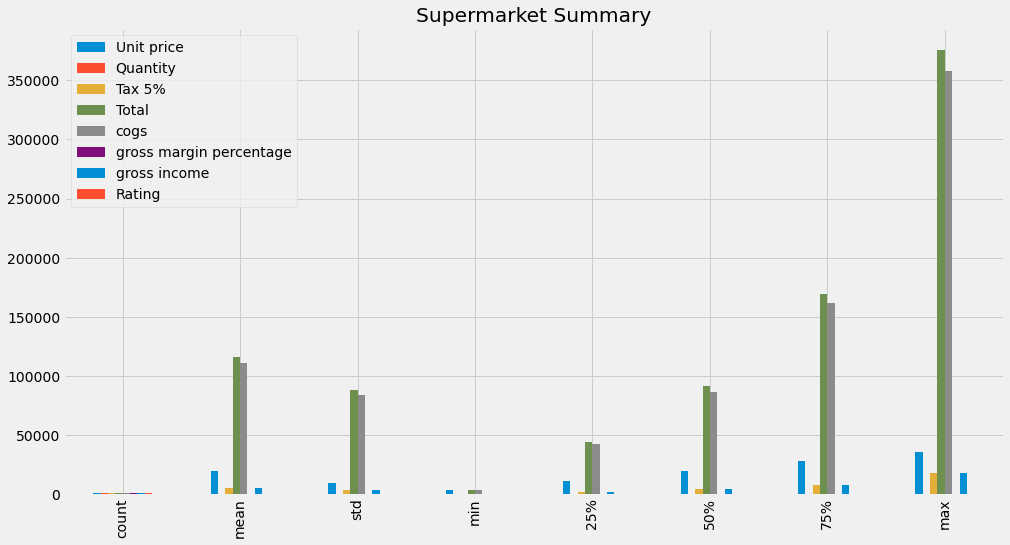

In [47]:
# The first thing was to bring the data into focus by plotting a summary.
summary.plot.bar(figsize = (15, 8))
plt.title('Supermarket Summary')

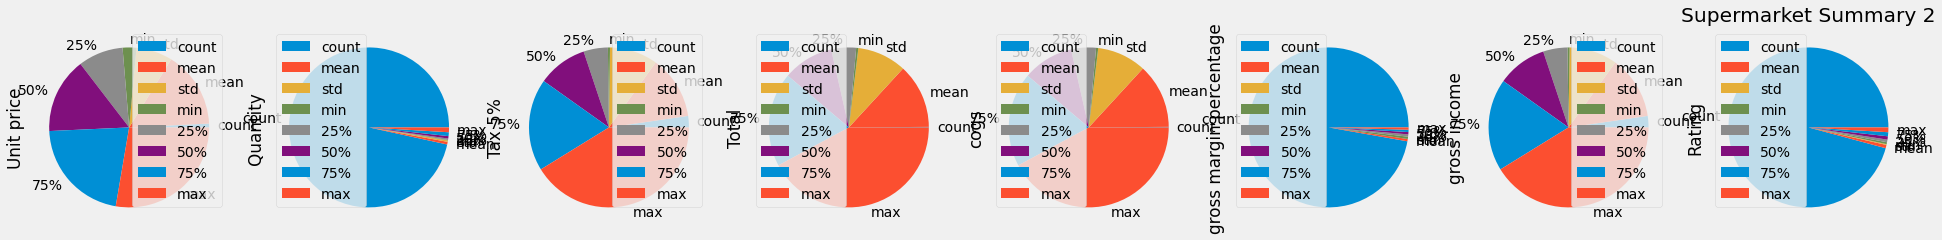

In [48]:
# Create a pie chart of the summary
summary.plot.pie(subplots=True, figsize=(30, 20))

plt.title('Supermarket Summary 2')
# Show the plot
plt.show()

gross income Summary:
count     1000.000000
mean      5536.572840
std       4215.177173
min        183.060000
25%       2132.955000
50%       4351.680000
75%       8080.290000
max      17874.000000
Name: gross income, dtype: float64
Quantity Summary:
count    1000.000000
mean        5.510000
std         2.923431
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Quantity, dtype: float64


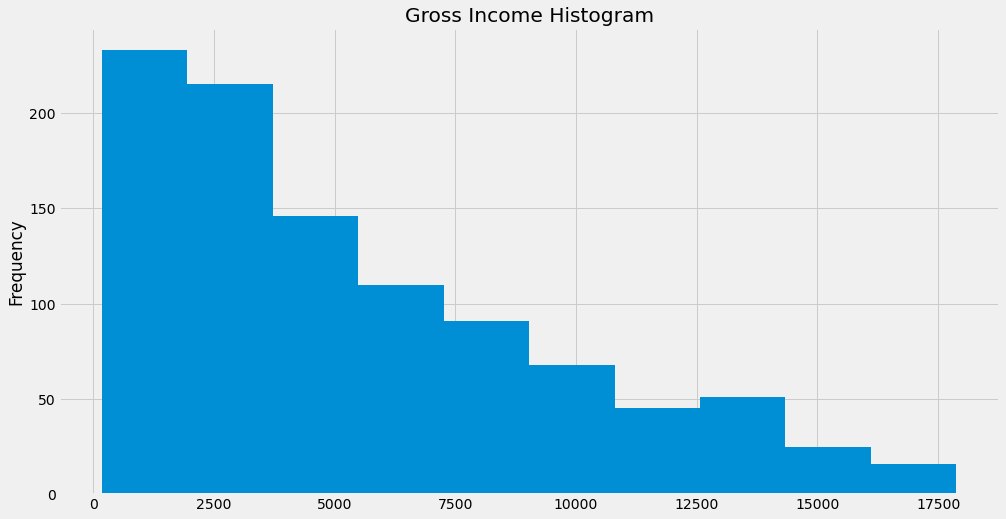

In [49]:
# Get summary statistics for the 'Unit Price' column
gross_income_summary = Supermarkets_Data['gross income'].describe()
print('gross income Summary:')
print(gross_income_summary)

# Get summary statistics for the 'Quantity' column
quantity_summary = Supermarkets_Data['Quantity'].describe()
print('Quantity Summary:')
print(quantity_summary)

# Plot a histogram of the 'Unit Price' column
plt.figure(figsize = (15, 8))
Supermarkets_Data['gross income'].plot.hist(title='Gross Income Histogram')
plt.show()

### 2. General sales information.

In [50]:
Supermarkets_Data_grouped = Supermarkets_Data.groupby('Product line')

sum_gross_income = Supermarkets_Data_grouped['gross income'].sum()
print(sum_gross_income)

mean_gross_income = Supermarkets_Data_grouped['gross income'].mean()
print(mean_gross_income)

multiple_agg = Supermarkets_Data_grouped['gross income'].agg(['sum', 'mean', 'min', 'max'])
print(multiple_agg)

Product line
Electronic accessories    931500.54
Fashion accessories       930958.20
Food and beverages        962483.04
Health and beauty         843321.24
Home and lifestyle        923347.08
Sports and travel         944962.74
Name: gross income, dtype: float64
Product line
Electronic accessories    5479.414941
Fashion accessories       5230.102247
Food and beverages        5531.511724
Health and beauty         5548.166053
Home and lifestyle        5770.919250
Sports and travel         5692.546627
Name: gross income, dtype: float64
                              sum         mean     min       max
Product line                                                    
Electronic accessories  931500.54  5479.414941  458.10  16156.26
Fashion accessories     930958.20  5230.102247  217.62  17874.00
Food and beverages      962483.04  5531.511724  388.44  17733.60
Health and beauty       843321.24  5548.166053  319.50  16290.00
Home and lifestyle      923347.08  5770.919250  251.64  17550.00
Sport

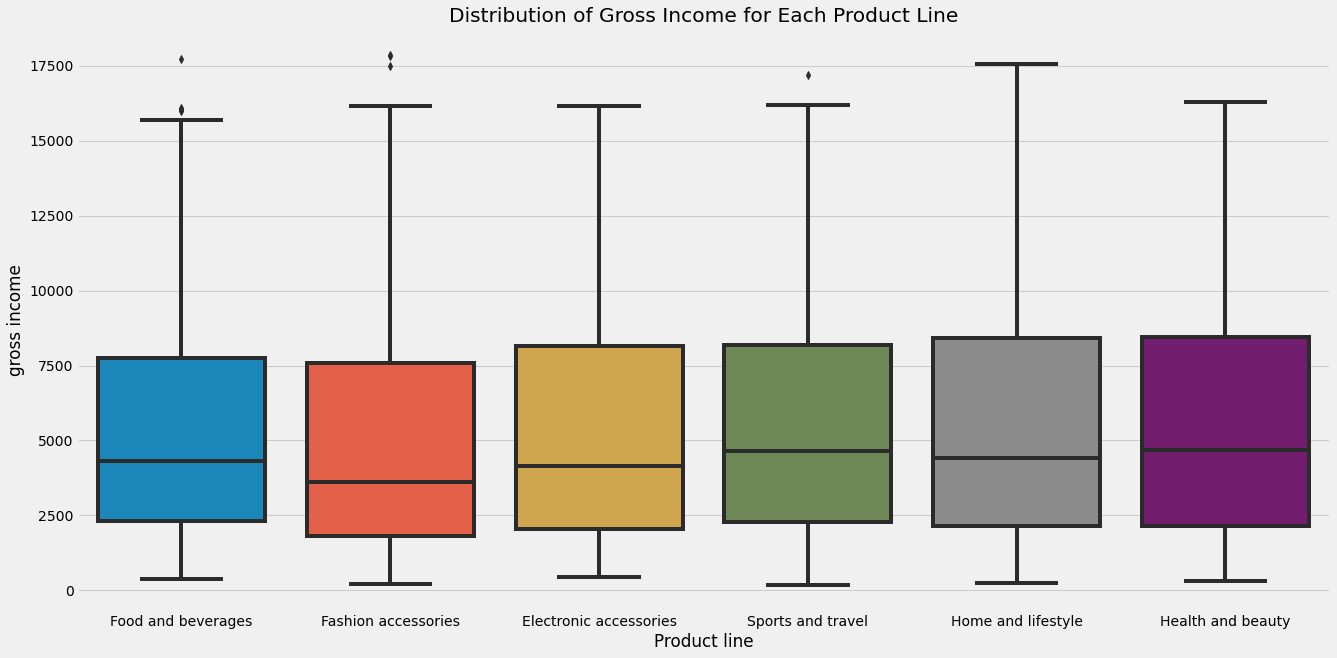

      Invoice ID Branch           City Customer type  Gender  \
261  744-16-7898      B          Abuja        Normal  Female   
331  303-96-2227      B          Abuja        Normal  Female   
386  687-47-8271      A          Lagos        Normal    Male   
733  234-65-2137      C  Port Harcourt        Normal    Male   
790  860-79-0874      C  Port Harcourt        Member  Female   
793  554-42-2417      C  Port Harcourt        Normal  Female   
818  271-88-8734      C  Port Harcourt        Member  Female   
862  283-26-5248      C  Port Harcourt        Member  Female   
903  751-41-9720      C  Port Harcourt        Normal    Male   

            Product line  Unit price  Quantity   Tax 5%     Total  ...  \
261   Home and lifestyle     35053.2        10  17526.6  368058.6  ...   
331   Home and lifestyle     35056.8        10  17528.4  368096.4  ...   
386  Fashion accessories     35632.8        10  17816.4  374144.4  ...   
733   Home and lifestyle     34408.8        10  17204.4  361292

In [51]:
# To create a Box plot for gross income
plt.figure(figsize = (20, 10))
sns.boxplot(x='Product line', y='gross income', data=Supermarkets_Data)
plt.title('Distribution of Gross Income for Each Product Line')
plt.show()

# Identify and isolate the outliers
outliers = Supermarkets_Data[Supermarkets_Data['gross income'] > Supermarkets_Data['gross income'].quantile(0.75) + 1.5*(Supermarkets_Data['gross income'].quantile(0.75) - Supermarkets_Data['gross income'].quantile(0.25))]

# Display the isolated outliers
print(outliers)

In [52]:
# Calculate the total gross income for each item
total_gross_income = Supermarkets_Data.groupby('Branch')['gross income'].sum()

# Find the item with the highest total gross income
max_item = total_gross_income.idxmax()
max_value = total_gross_income.max()

# Create a DataFrame with the result
result = pd.DataFrame({'Branch': [max_item], 'Total Gross Income': [max_value]})

# Display the result as a table
display(result)

print(total_gross_income)

,Branch,Total Gross Income
0,C,1895463.54


Branch
A    1820577.78
B    1820531.52
C    1895463.54
Name: gross income, dtype: float64


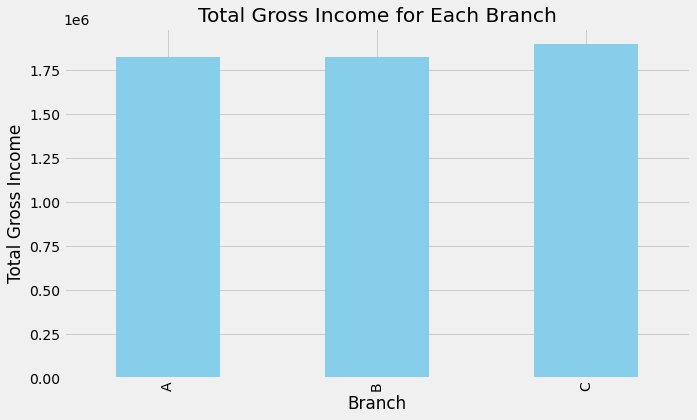

In [53]:
# Create a bar plot
plt.figure(figsize=(10,6))
total_gross_income.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Branch')
plt.ylabel('Total Gross Income')
plt.title('Total Gross Income for Each Branch')

# Show the plot
plt.show()


In [54]:
# Calculate the total gross income for each item
total_gross_income = Supermarkets_Data.groupby('Product line')['gross income'].sum()
print(total_gross_income)

# Find the item with the highest total gross income
max_item = total_gross_income.idxmax()
max_value = total_gross_income.max()


# Create a DataFrame with the result
result = pd.DataFrame({'Product line': [max_item], 'Total Gross Income': [max_value]})

# Display the result as a table
display(result)

Product line
Electronic accessories    931500.54
Fashion accessories       930958.20
Food and beverages        962483.04
Health and beauty         843321.24
Home and lifestyle        923347.08
Sports and travel         944962.74
Name: gross income, dtype: float64


,Product line,Total Gross Income
0,Food and beverages,962483.04


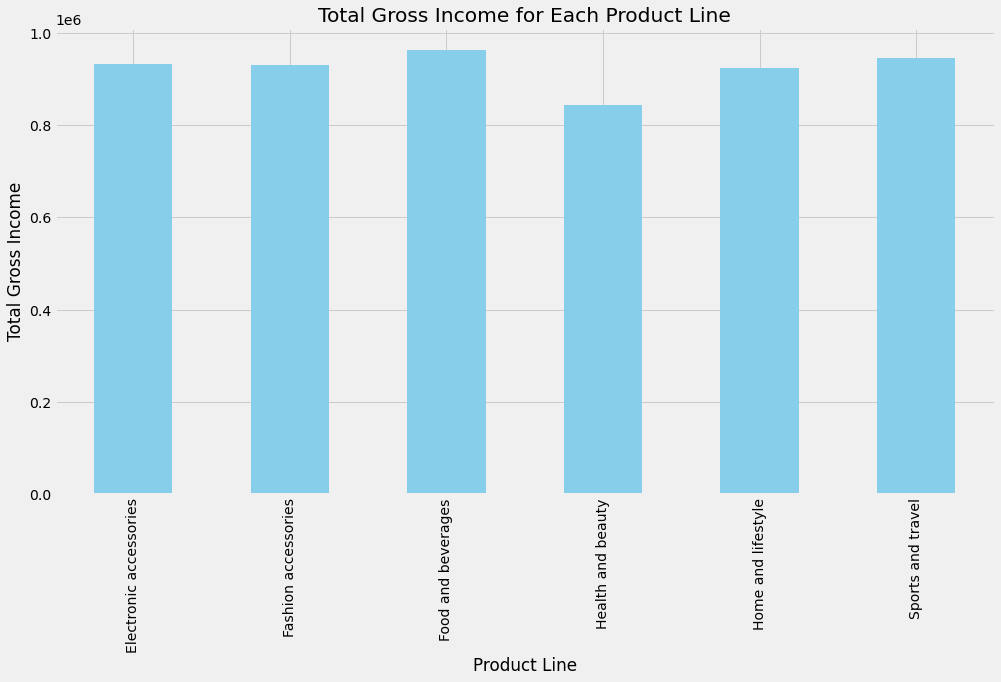

In [55]:
plt.figure(figsize=(15,8))
total_gross_income.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Product Line')
plt.ylabel('Total Gross Income')
plt.title('Total Gross Income for Each Product Line')

# Show the plot
plt.show()


In [56]:
# Group the data by branch and month and calculate the sum of sales for each group
grouped = Supermarkets_Data.groupby(['Branch', 'Month'])['Quantity'].sum().reset_index()

# Find the month with the highest sales total for each branch
result = grouped.loc[grouped.groupby('Branch')['Quantity'].idxmax()]

print(result)

  Branch  Month  Quantity
0      A      1       685
4      B      2       624
6      C      1       680


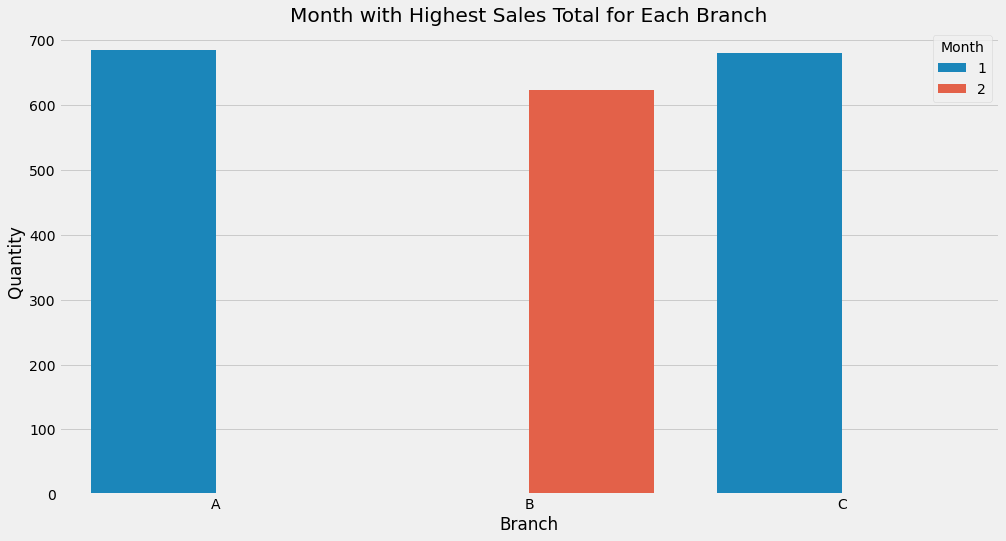

In [57]:
plt.figure(figsize=(15,8))
sns.barplot(x='Branch', y='Quantity', hue='Month', data=result, ci=None)

# Add labels and title
plt.xlabel('Branch')
plt.ylabel('Quantity')
plt.title('Month with Highest Sales Total for Each Branch')

# Show the plot
plt.show()


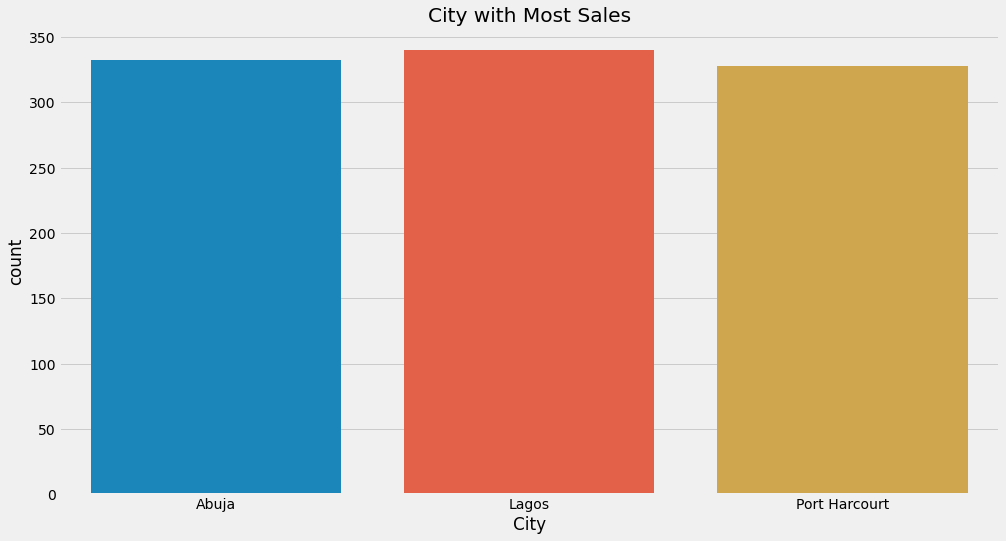

In [58]:
# Create a countplot of the 'City' column
plt.figure(figsize = (15, 8))
sns.countplot(x= 'City', data=Supermarkets_Data)
plt.title('City with Most Sales')
plt.show()

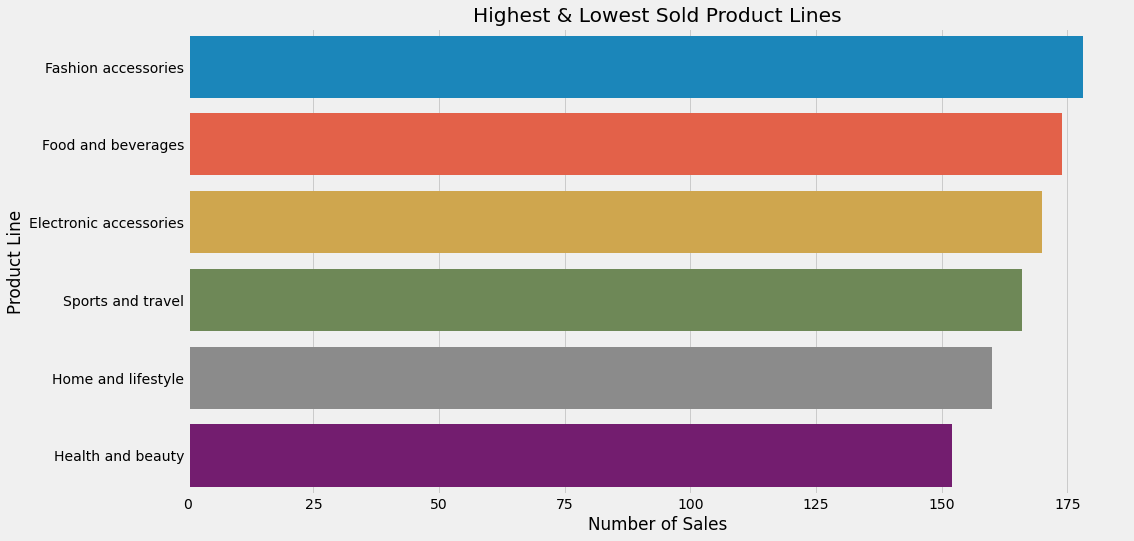

In [59]:
plt.figure(figsize = (15, 8))
# Create a countplot of the 'Product line' column
sns.countplot(y='Product line', data=Supermarkets_Data, order=Supermarkets_Data['Product line'].value_counts().index)

# Add labels and title
plt.xlabel('Number of Sales')
plt.ylabel('Product Line')
plt.title('Highest & Lowest Sold Product Lines')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Highest & Lowest Sold Product Lines Across Branches')

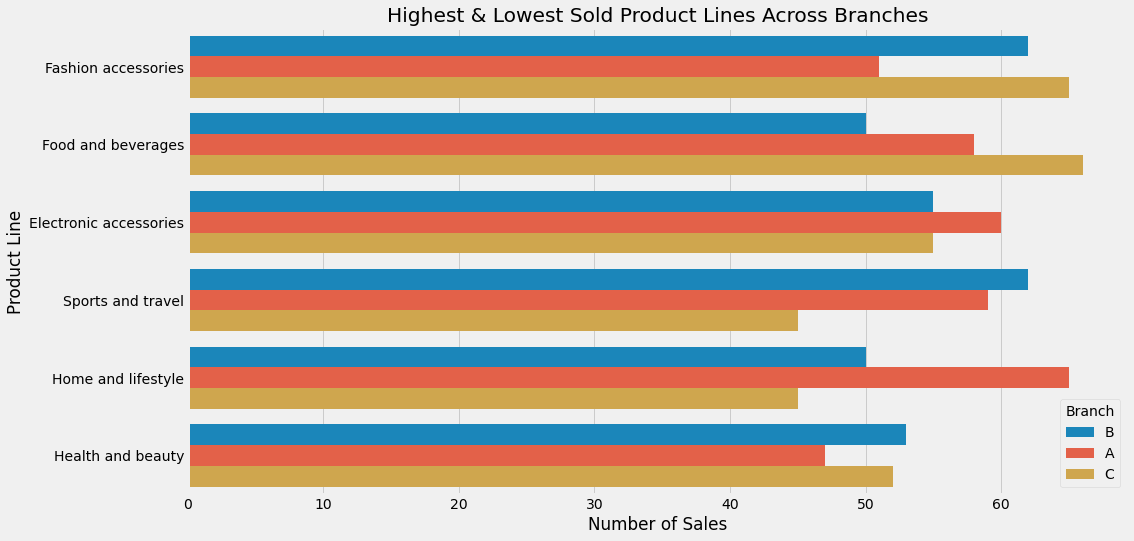

In [60]:
plt.figure(figsize = (15, 8))
# Create a countplot of the 'Product line' column with 'branch' as hue
sns.countplot(y='Product line', hue='Branch', data=Supermarkets_Data, order=Supermarkets_Data['Product line'].value_counts().index)

# Add labels and title
plt.xlabel('Number of Sales')
plt.ylabel('Product Line')
plt.title('Highest & Lowest Sold Product Lines Across Branches')


<Figure size 2160x1080 with 0 Axes>

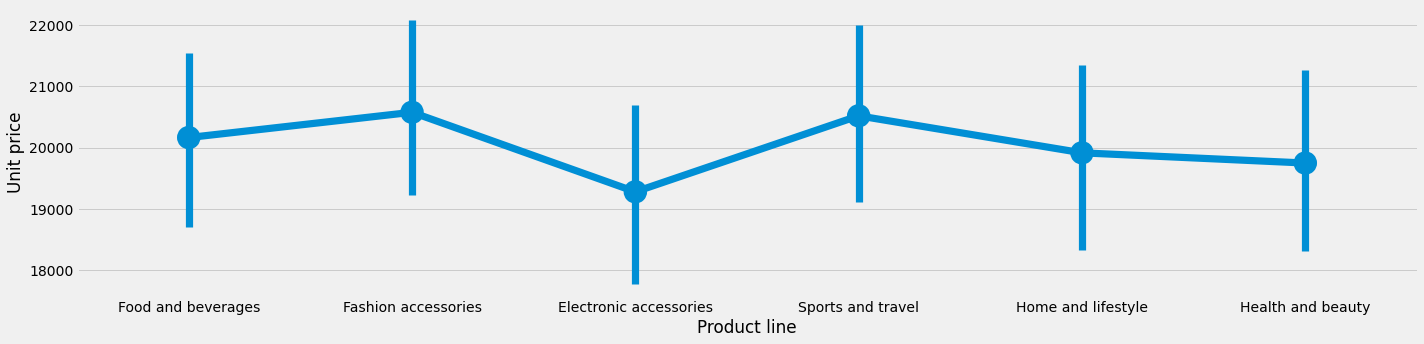

In [61]:
plt.figure(figsize = (30, 15))
sns.catplot('Product line', 'Unit price', data=Supermarkets_Data, aspect=4, kind='point')

plt.show()

<Figure size 2160x1080 with 0 Axes>

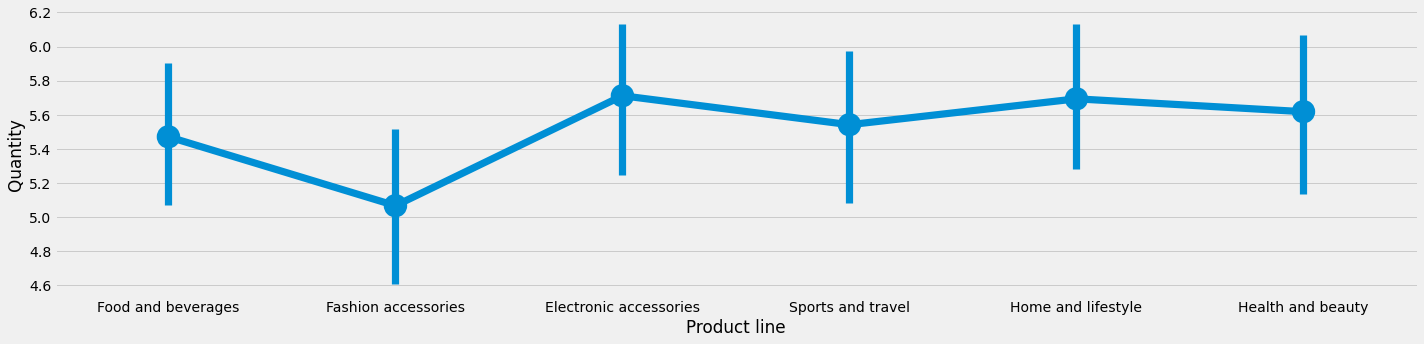

In [62]:
plt.figure(figsize = (30, 15))
sns.catplot('Product line', 'Quantity', data=Supermarkets_Data, aspect=4, kind='point')

plt.show()

### 3. Payment Information

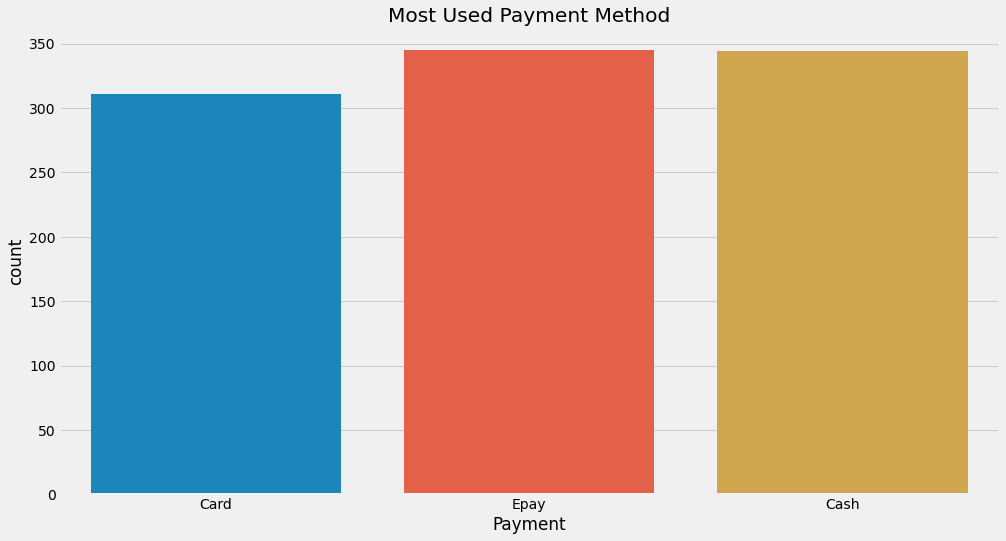

In [63]:
# Create a countplot of the 'Payment' column
plt.figure(figsize = (15, 8))
sns.countplot(x='Payment', data=Supermarkets_Data)
plt.title('Most Used Payment Method')
plt.show()



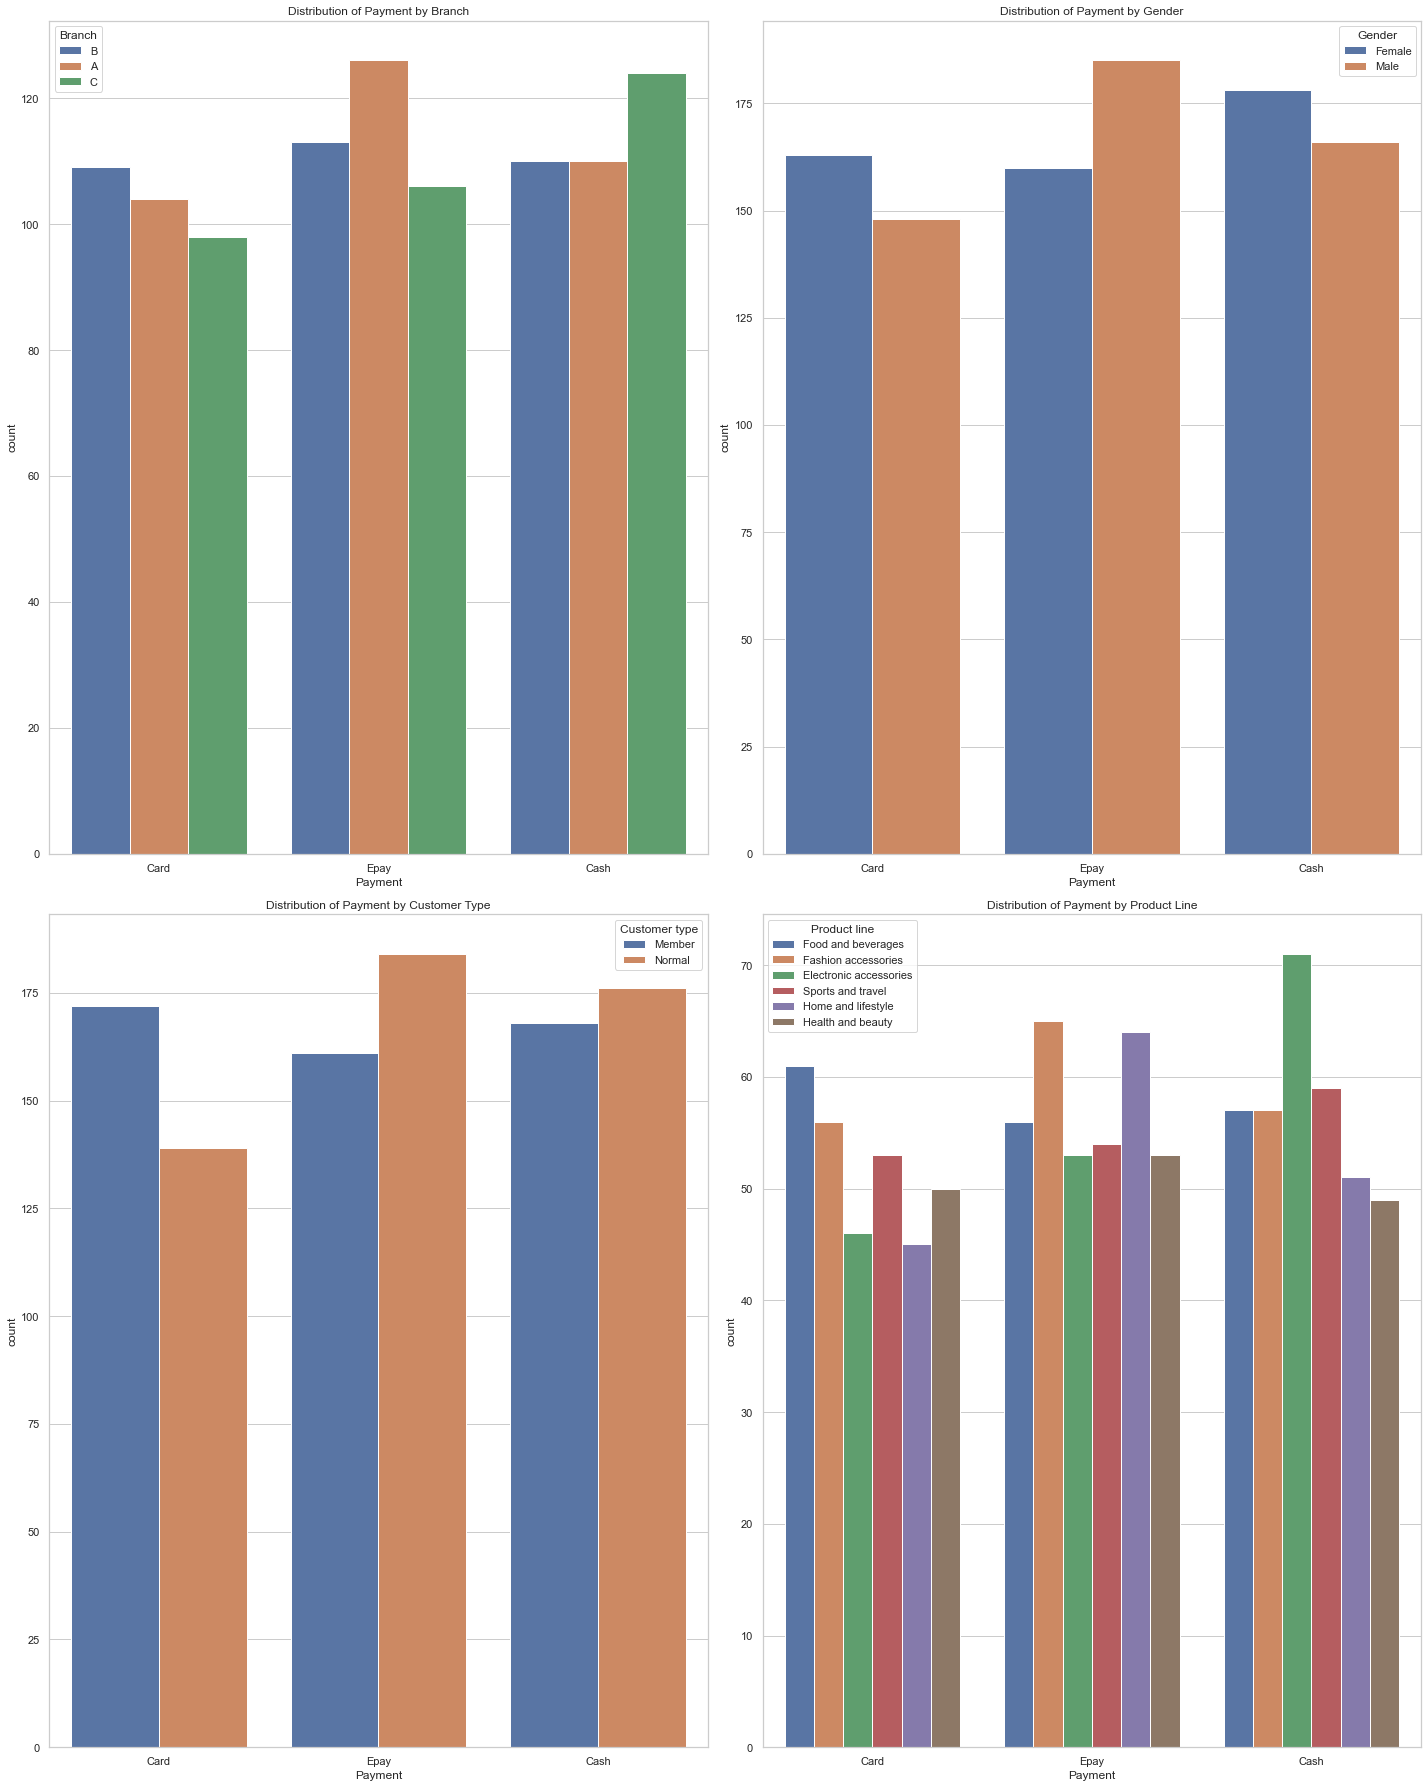

In [64]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create subplots to visualize the distribution of 'Payment' across different categories
fig, axes = plt.subplots(2, 2, figsize=(20, 25))

# Create a categorical plot for each subplot
sns.countplot(x='Payment', hue='Branch', data=Supermarkets_Data, ax=axes[0, 0])
sns.countplot(x='Payment', hue='Gender', data=Supermarkets_Data, ax=axes[0, 1])
sns.countplot(x='Payment', hue='Customer type', data=Supermarkets_Data, ax=axes[1, 0])
sns.countplot(x='Payment', hue='Product line', data=Supermarkets_Data, ax=axes[1, 1])

# Set titles and labels for each subplot
axes[0, 0].set_title('Distribution of Payment by Branch')
axes[0, 1].set_title('Distribution of Payment by Gender')
axes[1, 0].set_title('Distribution of Payment by Customer Type')
axes[1, 1].set_title('Distribution of Payment by Product Line')

# Show the plot
plt.tight_layout()
plt.show()

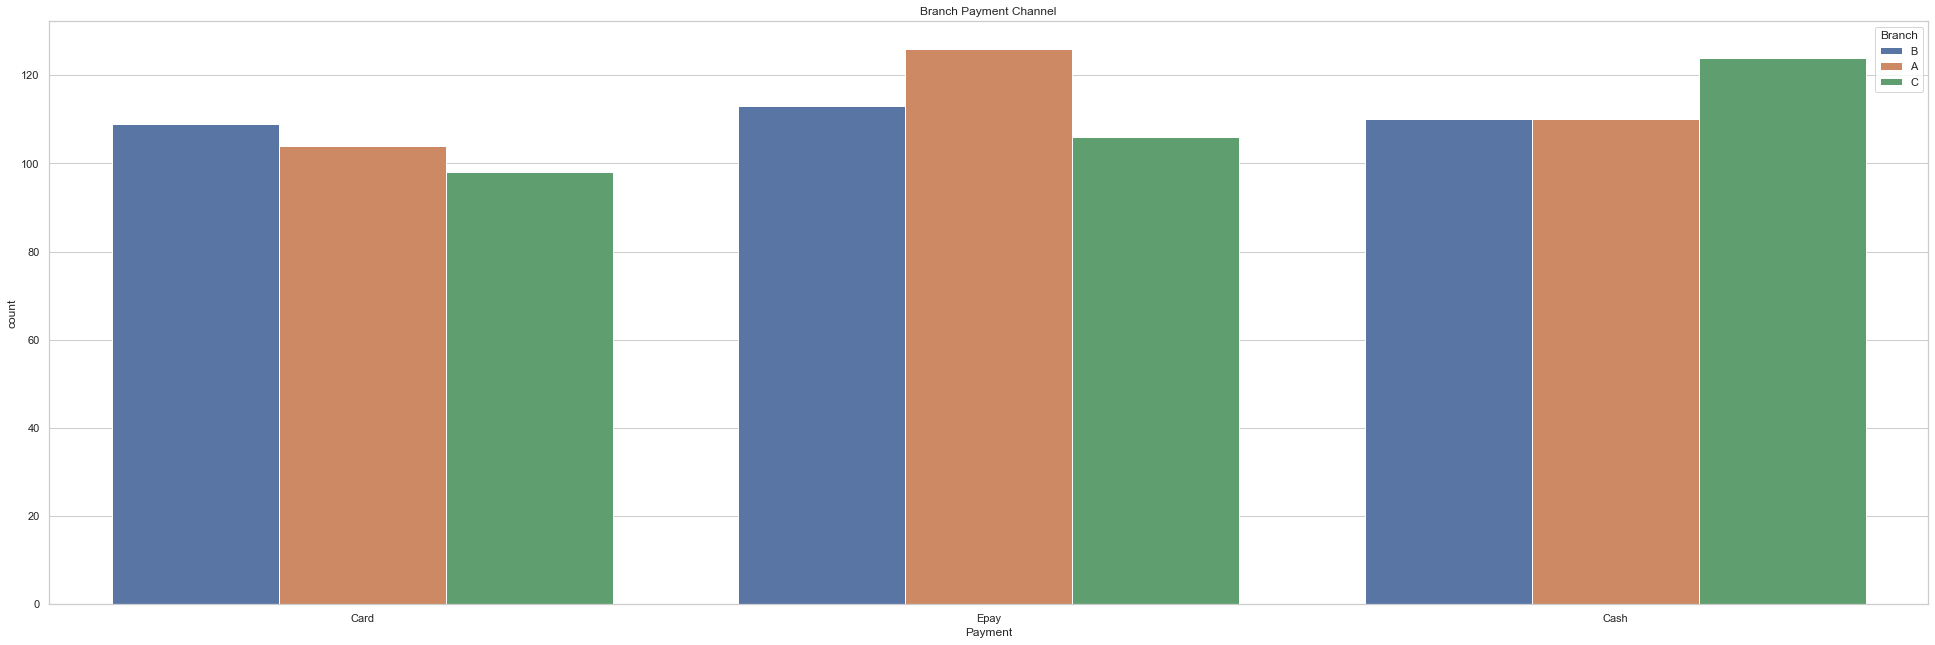

In [65]:
plt.figure(figsize=(30, 10)) 
sns.countplot(x='Payment',hue='Branch',data=Supermarkets_Data)
plt.title('Branch Payment Channel')
plt.show()

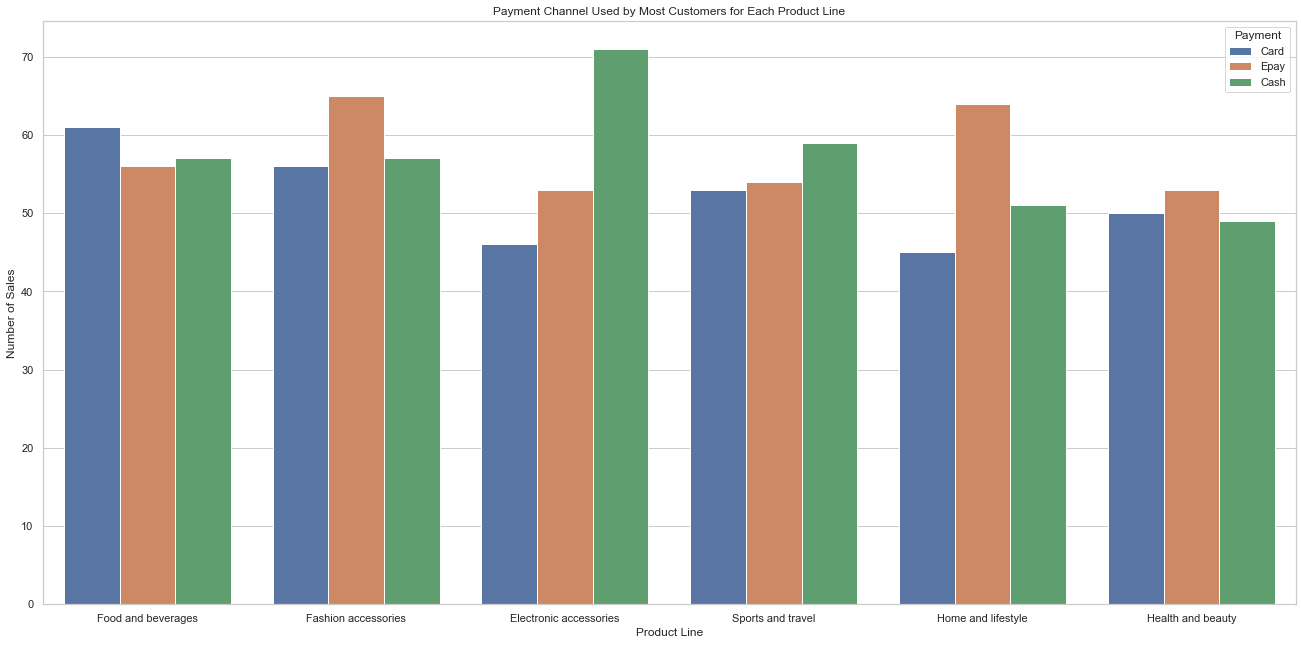

In [66]:
plt.figure(figsize = (20, 10))
# Create a countplot with 'Product line' on the Y-axis and 'Payment' as hue
sns.countplot(x='Product line', hue='Payment', data=Supermarkets_Data)

# Add labels and title
plt.ylabel('Number of Sales')
plt.xlabel('Product Line')
plt.title('Payment Channel Used by Most Customers for Each Product Line')

# Show the plot
plt.show()

<Figure size 2160x1440 with 0 Axes>

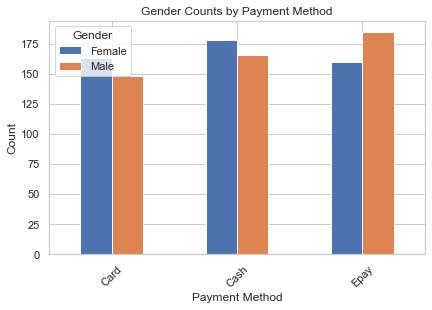

In [67]:
# Pivot the data to have Payment methods as columns and Gender counts as values
gender_counts_by_payment_pivot = gender_counts_by_payment.unstack()

# Plot the gender counts by payment method as a grouped bar plot
plt.figure(figsize=(30, 20))
gender_counts_by_payment_pivot.plot(kind='bar', stacked=False)
plt.title('Gender Counts by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

Text(0.5, 1.0, 'Payment by Gender Count')

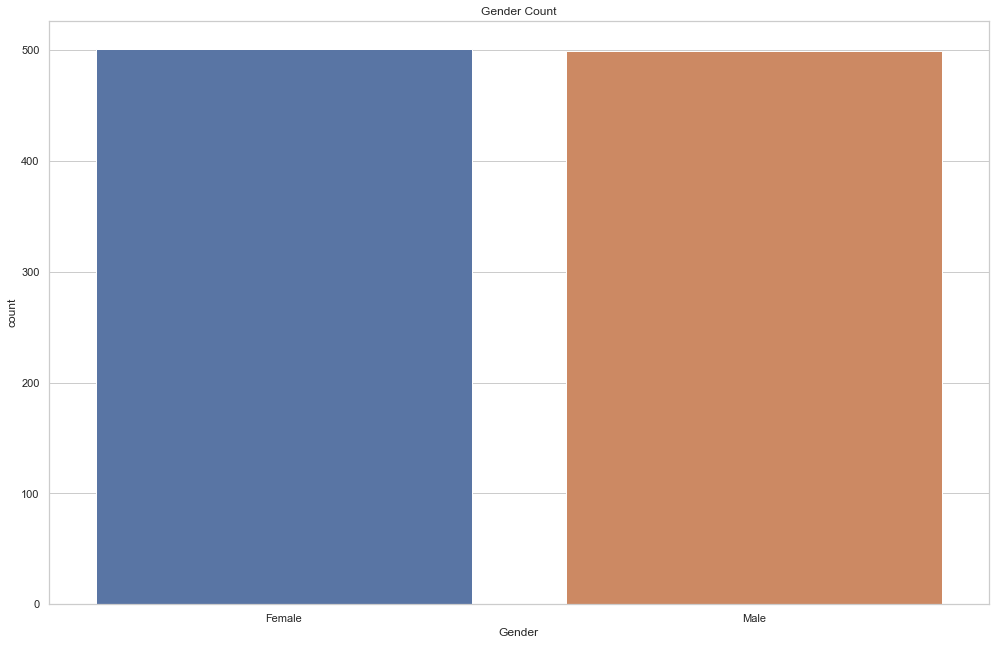

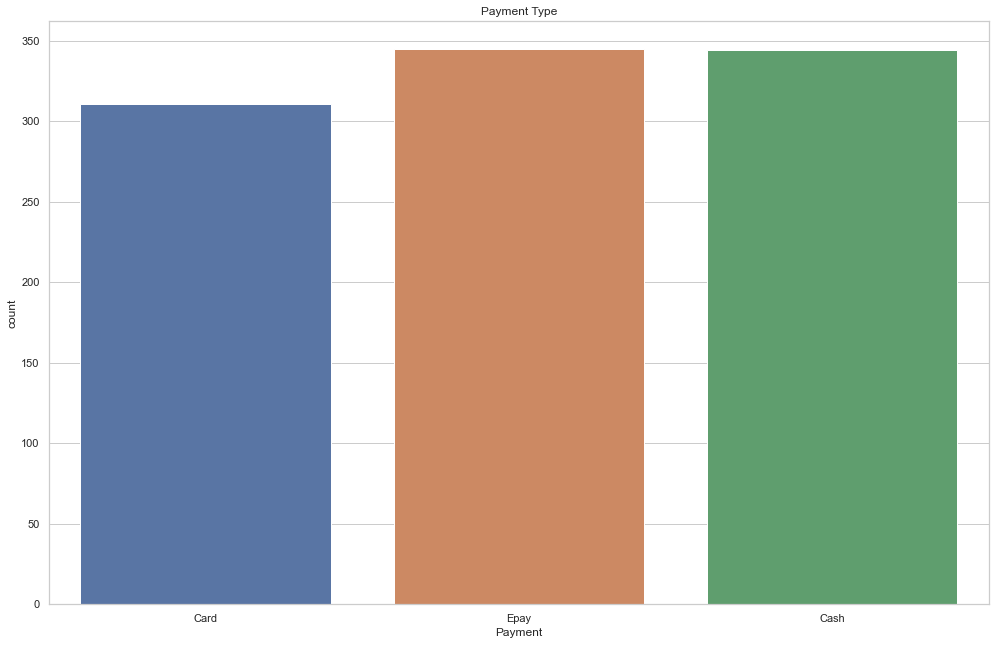

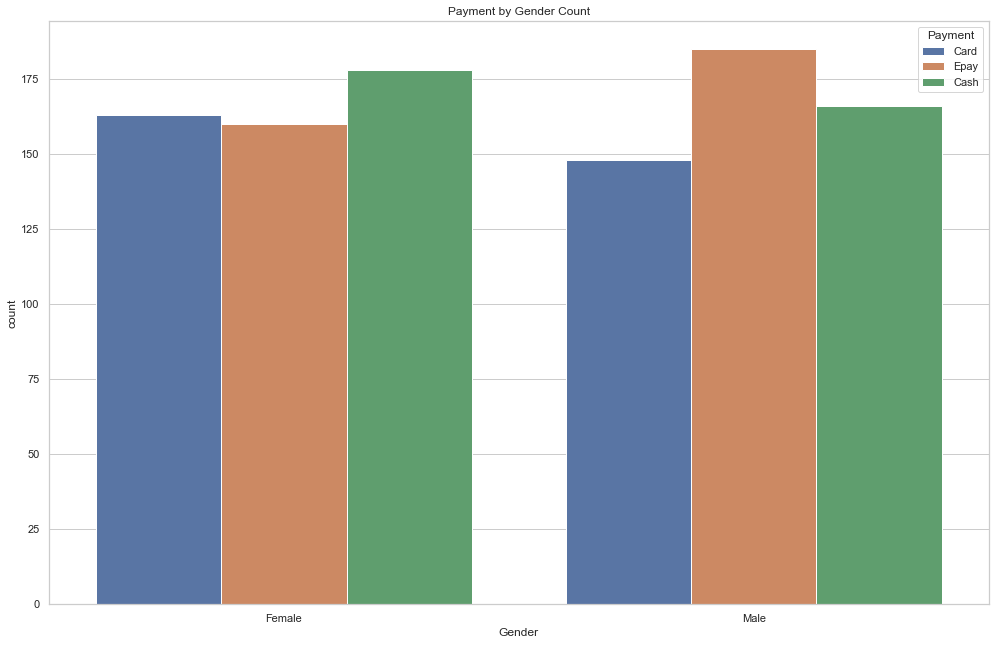

In [68]:
# Display count plot for 'Gender'
plt.figure(figsize=(15, 10))
sns.countplot(x='Gender', data=Supermarkets_Data)
plt.title('Gender Count')

# Display count plot for 'Payment'
plt.figure(figsize=(15, 10))
sns.countplot(x='Payment', data=Supermarkets_Data)
plt.title('Payment Type')

# Compare the values in the categorical columns 'Gender' and 'Payment'
plt.figure(figsize=(15, 10))
sns.countplot(x='Gender', hue='Payment', data=Supermarkets_Data)
plt.title('Payment by Gender Count')

Text(0.5, 1.0, 'Payment by Customer Count')

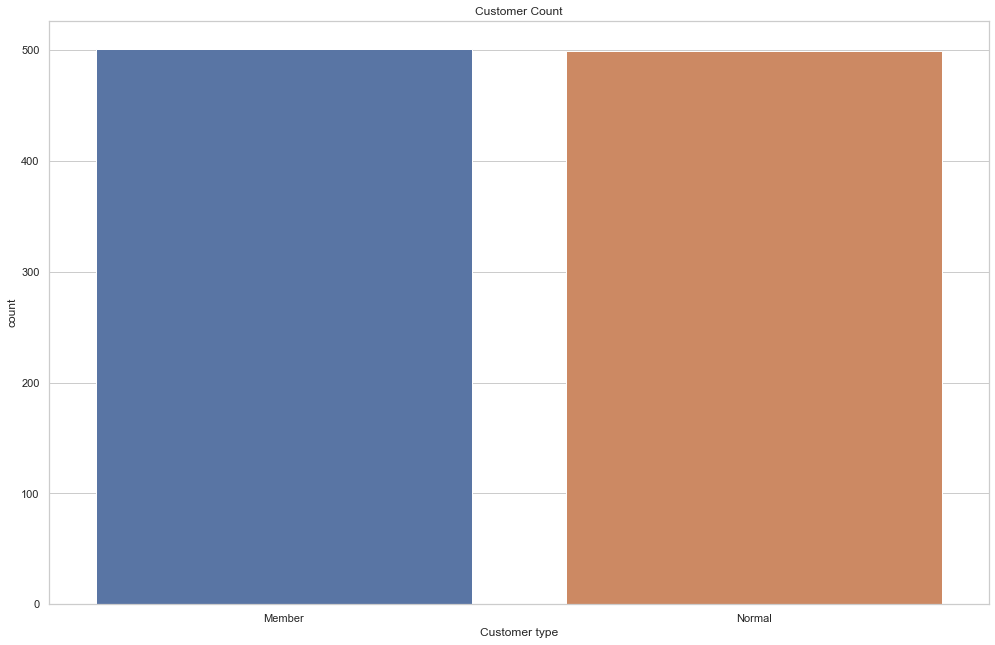

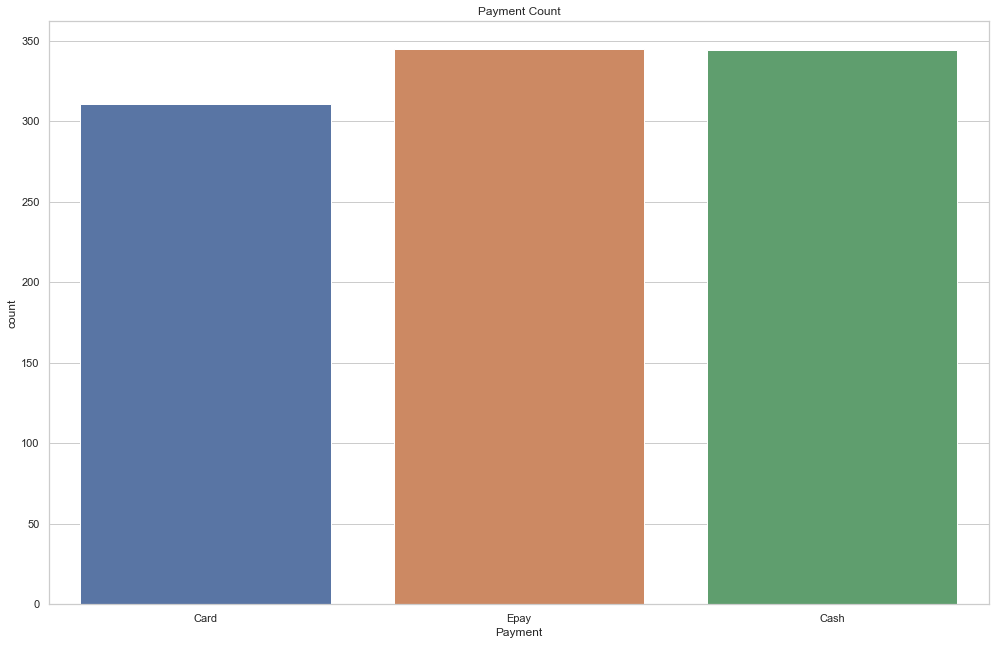

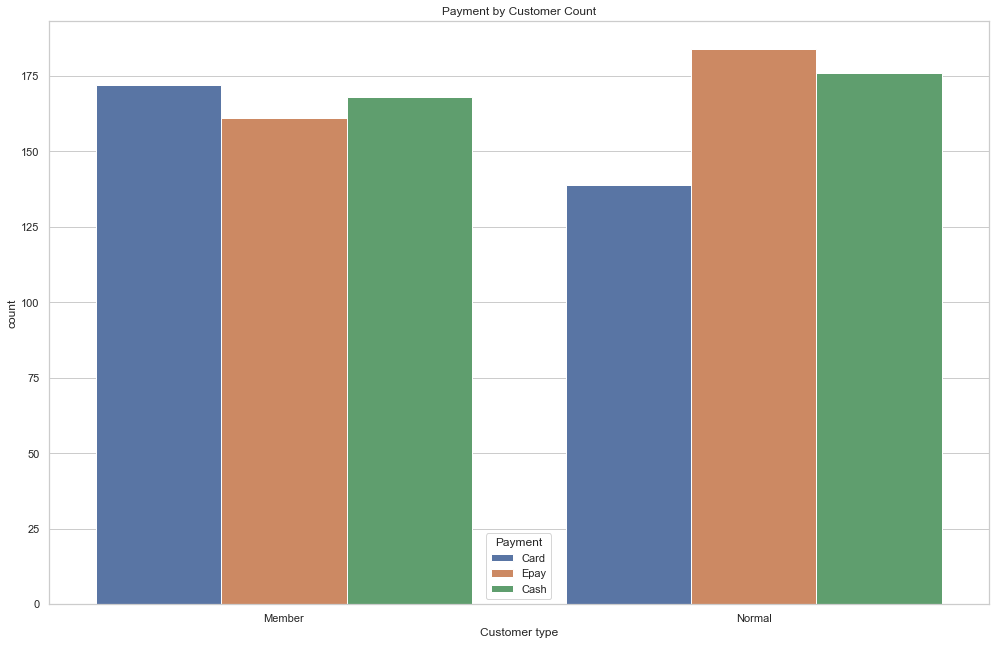

In [69]:
# Display count plot for 'Gender'
plt.figure(figsize=(15, 10))
sns.countplot(x='Customer type', data=Supermarkets_Data)
plt.title('Customer Count')

# Display count plot for 'Payment'
plt.figure(figsize=(15, 10))
sns.countplot(x='Payment', data=Supermarkets_Data)
plt.title('Payment Count')

# Compare the values in the categorical columns 'Gender' and 'Payment'
plt.figure(figsize=(15, 10))
sns.countplot(x='Customer type', hue='Payment', data=Supermarkets_Data)
plt.title('Payment by Customer Count')

### 4. Branch Performance

In [70]:
# Group by item and location and calculate total sales
grouped_Supermarkets_Data = Supermarkets_Data.groupby(['Product line', 'City']).sum()

# Sort by sales in descending order
sorted_Supermarkets_Data = grouped_Supermarkets_Data.sort_values(by='Quantity', ascending = False)

# Display the result
print(sorted_Supermarkets_Data)

                                      Unit price  Quantity     Tax 5%  \
Product line           City                                             
Home and lifestyle     Lagos           1306789.2       371  384294.78   
Food and beverages     Port Harcourt   1360807.2       369  407431.80   
Fashion accessories    Port Harcourt   1397822.4       342  369601.20   
Electronic accessories Port Harcourt   1105027.2       333  325182.42   
Sports and travel      Lagos           1181163.6       333  332103.42   
                       Abuja           1332014.4       322  342654.84   
Electronic accessories Lagos           1185217.2       322  314007.66   
Health and beauty      Abuja           1110182.4       320  342525.60   
Electronic accessories Abuja            987112.8       316  292310.46   
Food and beverages     Lagos           1147867.2       313  294224.58   
Fashion accessories    Abuja           1224115.2       297  281371.14   
Home and lifestyle     Abuja            999252.0   

<Figure size 864x576 with 0 Axes>

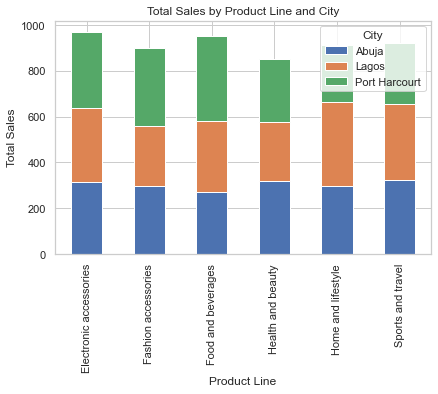

In [71]:
# Plot the grouped and sorted data
plt.figure(figsize=(12, 8))
sorted_Supermarkets_Data['Quantity'].unstack().plot(kind='bar', stacked=True)
plt.title('Total Sales by Product Line and City')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

<Figure size 1440x1080 with 0 Axes>

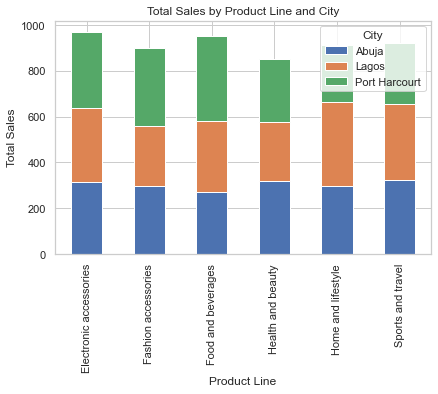

In [72]:
# Plot the grouped and sorted data as a stacked bar plot
plt.figure(figsize=(20, 15))
sorted_Supermarkets_Data['Quantity'].unstack().plot(kind='bar', stacked=True)
plt.title('Total Sales by Product Line and City')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

<Figure size 864x576 with 0 Axes>

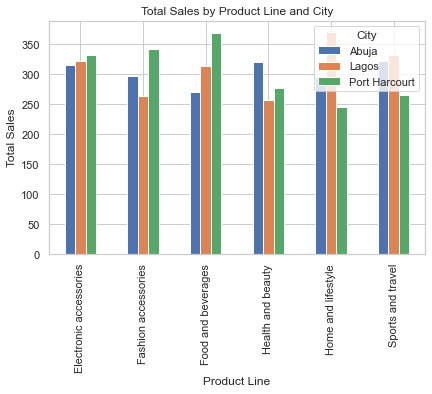

In [73]:
# Plot the grouped and sorted data as a grouped bar plot
plt.figure(figsize=(12, 8))
sorted_Supermarkets_Data['Quantity'].unstack().plot(kind='bar')
plt.title('Total Sales by Product Line and City')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

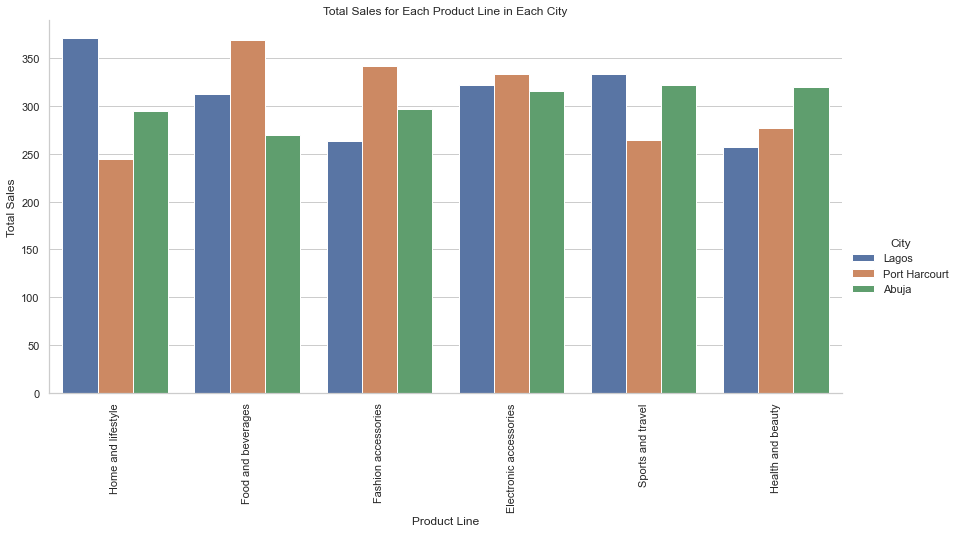

In [74]:
# Reset the index of the DataFrame
sorted_Supermarkets_Data_reset = sorted_Supermarkets_Data.reset_index()

# Create a catplot
g = sns.catplot(x='Product line', y='Quantity', hue='City', data=sorted_Supermarkets_Data_reset, kind='bar', height=6, aspect=2)
g.set_axis_labels("Product Line", "Total Sales")
plt.title('Total Sales for Each Product Line in Each City')
plt.xticks(rotation=90)
plt.show()


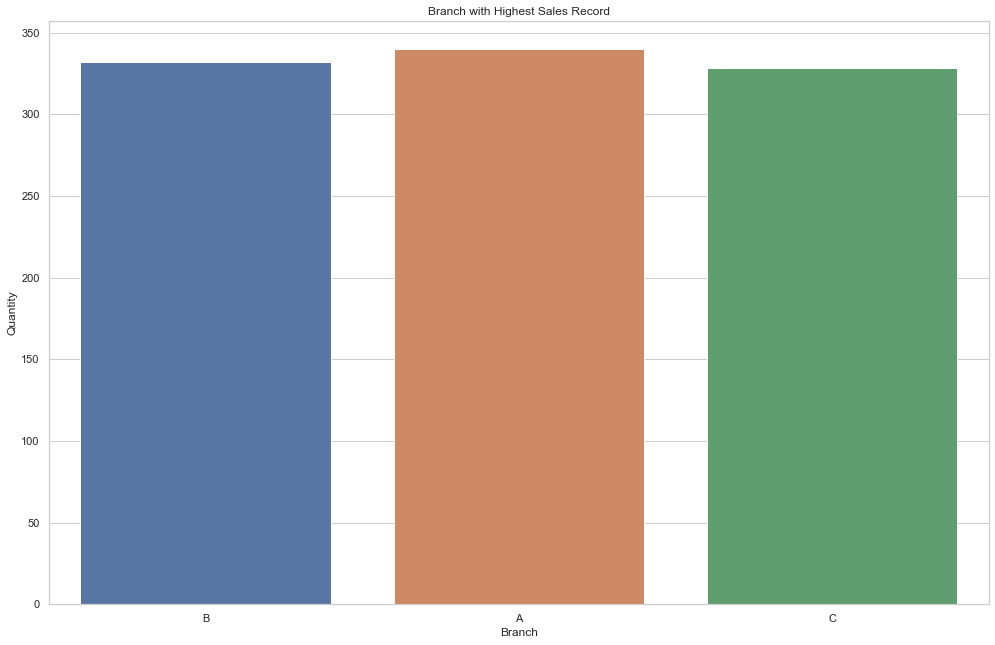

In [75]:
plt.figure(figsize = (15, 10))
# Create a countplot of the 'Branch' column
sns.countplot(x='Branch', data=Supermarkets_Data)

# Add labels and title
plt.xlabel('Branch')
plt.ylabel('Quantity')
plt.title('Branch with Highest Sales Record')

# Show the plot
plt.show()

In [76]:
# Group the DataFrame by the column and apply the sum and mean aggregation functions
result = Supermarkets_Data.groupby('Branch').agg({'gross income': ['sum', 'mean'], 'gross margin percentage': ['sum', 'mean']})

# Print the result
print(result)

       gross income              gross margin percentage          
                sum         mean                     sum      mean
Branch                                                            
A        1820577.78  5354.640529             1619.047619  4.761905
B        1820531.52  5483.528675             1580.952381  4.761905
C        1895463.54  5778.852256             1561.904762  4.761905


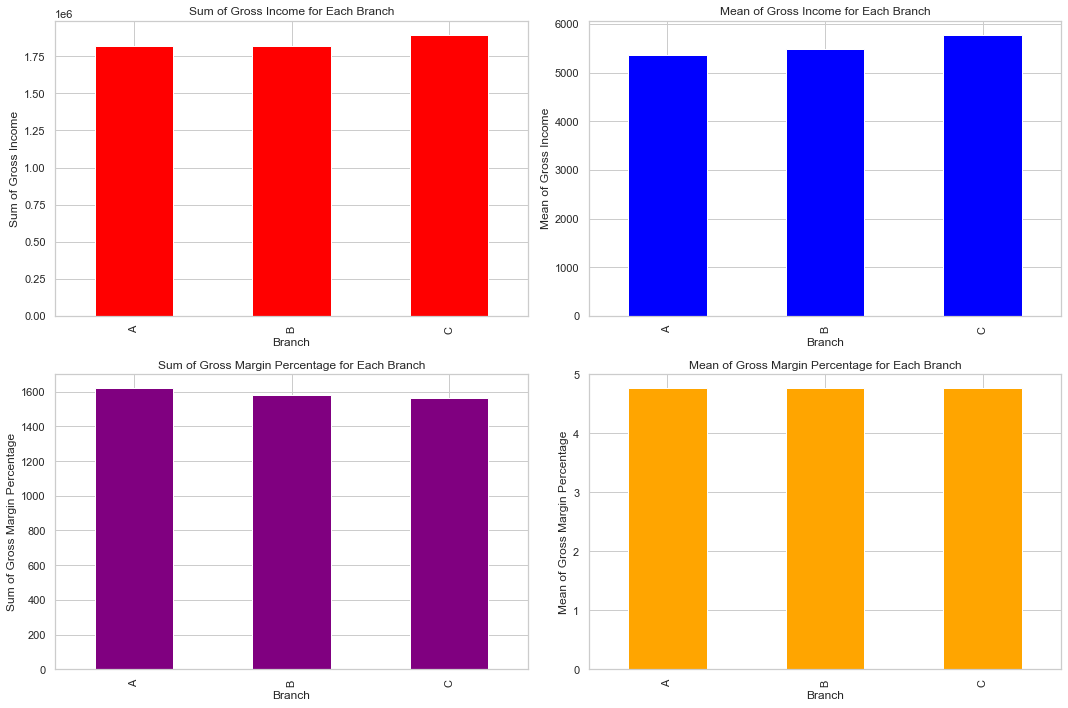

In [77]:
# Create a subplot with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Plot for sum of gross income
result['gross income', 'sum'].plot(kind='bar', ax=axs[0, 0], color='red')
axs[0, 0].set_title('Sum of Gross Income for Each Branch')
axs[0, 0].set_xlabel('Branch')
axs[0, 0].set_ylabel('Sum of Gross Income')

# Plot for mean of gross income
result['gross income', 'mean'].plot(kind='bar', ax=axs[0, 1], color='blue')
axs[0, 1].set_title('Mean of Gross Income for Each Branch')
axs[0, 1].set_xlabel('Branch')
axs[0, 1].set_ylabel('Mean of Gross Income')

# Plot for sum of gross margin percentage
result['gross margin percentage', 'sum'].plot(kind='bar', ax=axs[1, 0], color='purple')
axs[1, 0].set_title('Sum of Gross Margin Percentage for Each Branch')
axs[1, 0].set_xlabel('Branch')
axs[1, 0].set_ylabel('Sum of Gross Margin Percentage')

# Plot for mean of gross margin percentage
result['gross margin percentage', 'mean'].plot(kind='bar', ax=axs[1, 1], color='orange')
axs[1, 1].set_title('Mean of Gross Margin Percentage for Each Branch')
axs[1, 1].set_xlabel('Branch')
axs[1, 1].set_ylabel('Mean of Gross Margin Percentage')

# Show the plot
plt.tight_layout()
plt.show()


### 5. Customer Information

In [78]:
# Get the unique values in the 'Category' column
unique_values = Supermarkets_Data['Customer type'].unique()

# Print the result
print(unique_values)

['Member' 'Normal']


In [79]:
# Get the counts of unique values in the 'Category' column
value_counts = Supermarkets_Data['Customer type'].value_counts()

# Print the result
print(value_counts)

Member    501
Normal    499
Name: Customer type, dtype: int64


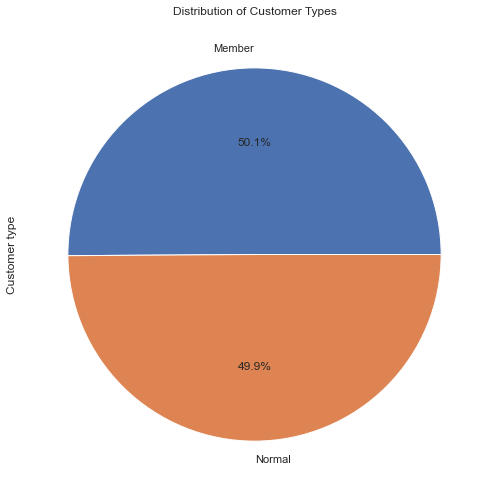

In [80]:
# Get the counts of unique values in the 'Customer type' column
value_counts = Supermarkets_Data['Customer type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8,8))
value_counts.plot(kind='pie', autopct='%1.1f%%')

# Add title
plt.title('Distribution of Customer Types')

# Show the plot
plt.show()


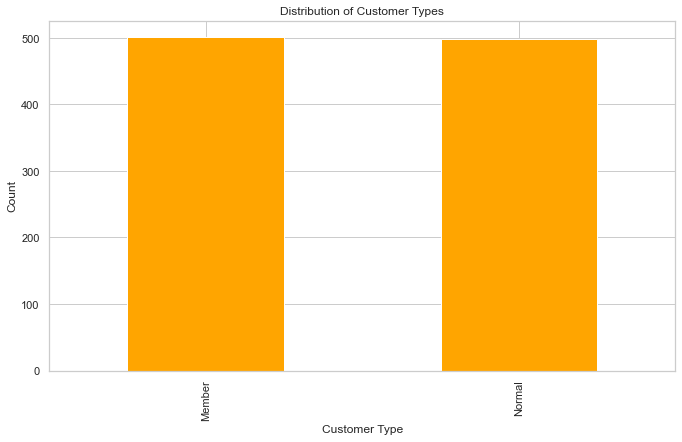

In [81]:
# Create a bar plot
plt.figure(figsize=(10,6))
value_counts.plot(kind='bar', color='orange')

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Distribution of Customer Types')

# Show the plot
plt.show()


In [82]:
print(Supermarkets_Data['Customer type'].value_counts())
print(Supermarkets_Data['Payment'].value_counts())

print(Supermarkets_Data.groupby('Customer type')['Payment'].value_counts())


Member    501
Normal    499
Name: Customer type, dtype: int64
Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64
Customer type  Payment
Member         Card       172
               Cash       168
               Epay       161
Normal         Epay       184
               Cash       176
               Card       139
Name: Payment, dtype: int64


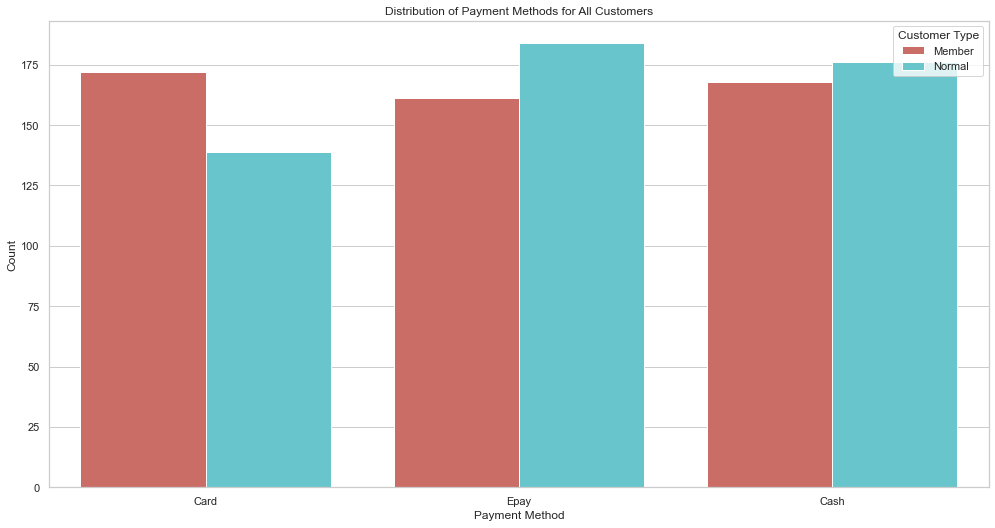

In [83]:
plt.figure(figsize=(15,8))
sns.countplot(x='Payment', hue='Customer type', data=Supermarkets_Data, palette='hls')
plt.title('Distribution of Payment Methods for All Customers')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Customer Type')
plt.show()


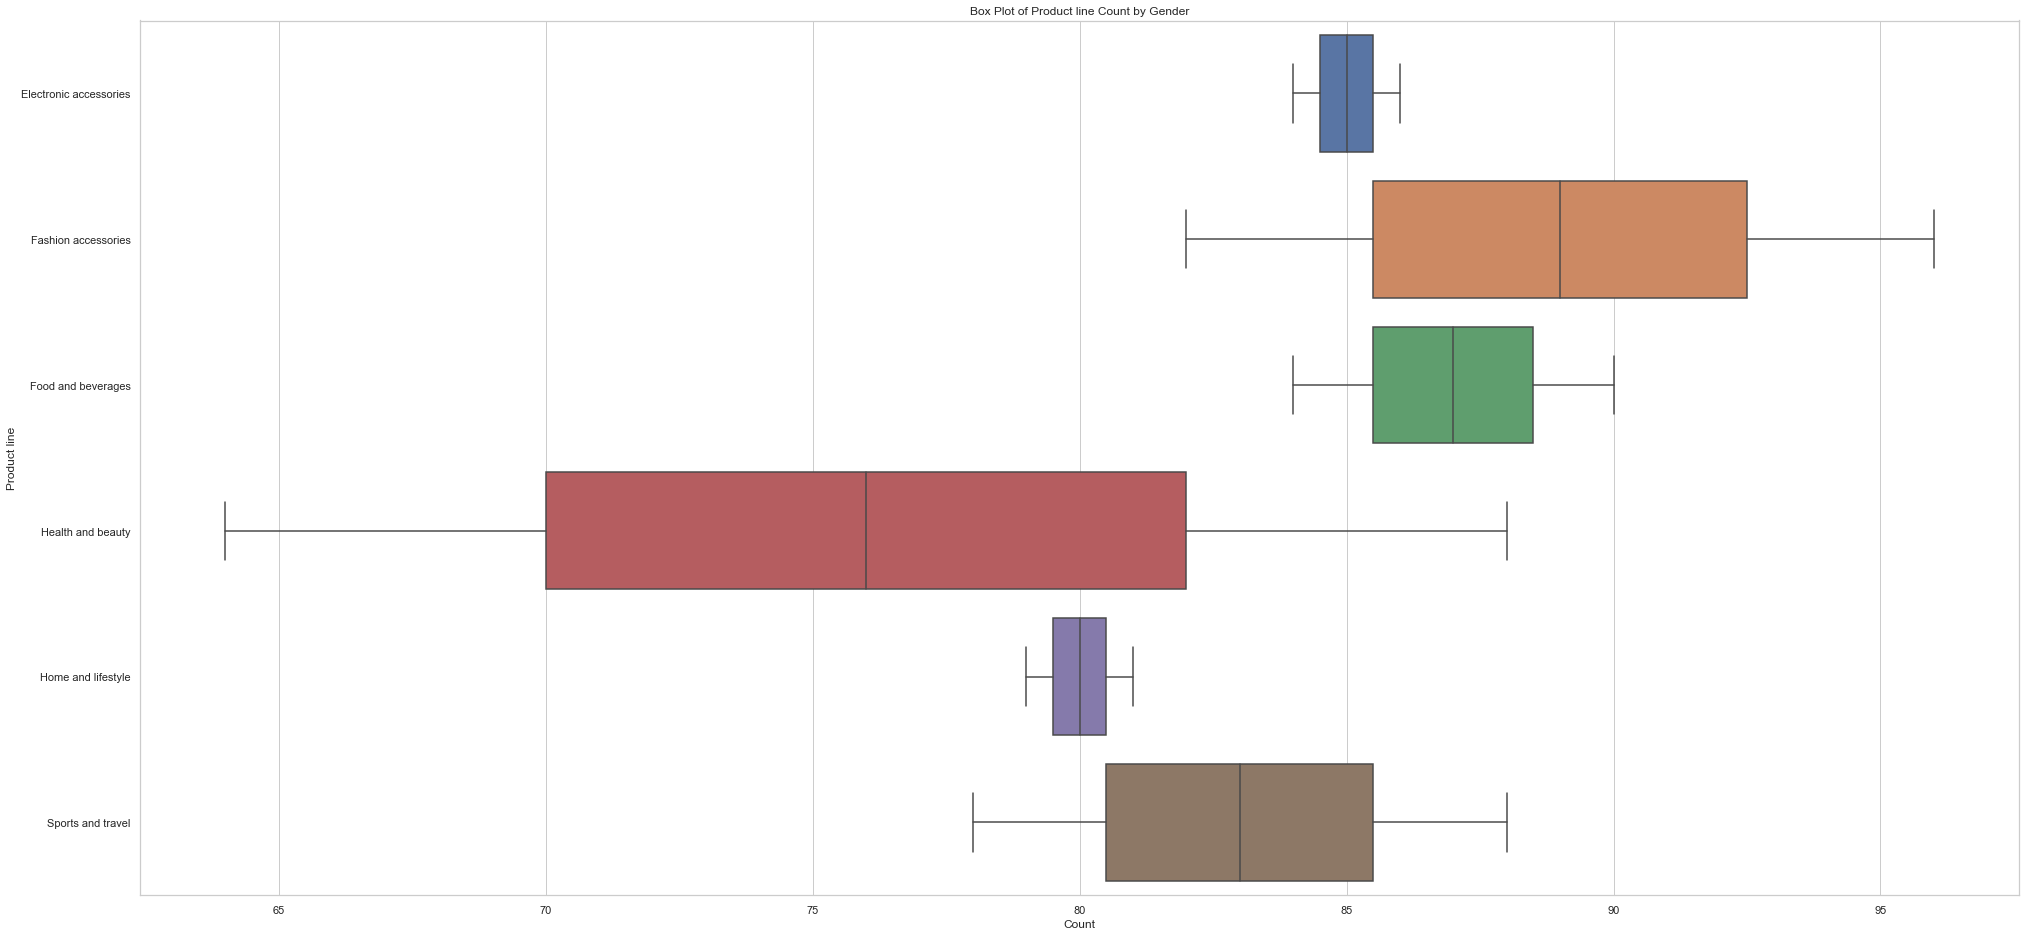

In [84]:
# Group by 'Gender' and 'Product line', and then obtain the value counts
grouped_counts = Supermarkets_Data.groupby('Gender')['Product line'].value_counts()

# Reshape the data for plotting
grouped_counts = grouped_counts.unstack().fillna(0)

# Create the box plot
plt.figure(figsize=(30, 15))
sns.boxplot(data=grouped_counts, orient='h')
plt.xlabel('Count')
plt.ylabel('Product line')
plt.title('Box Plot of Product line Count by Gender')
plt.show()

<Figure size 2160x1080 with 0 Axes>

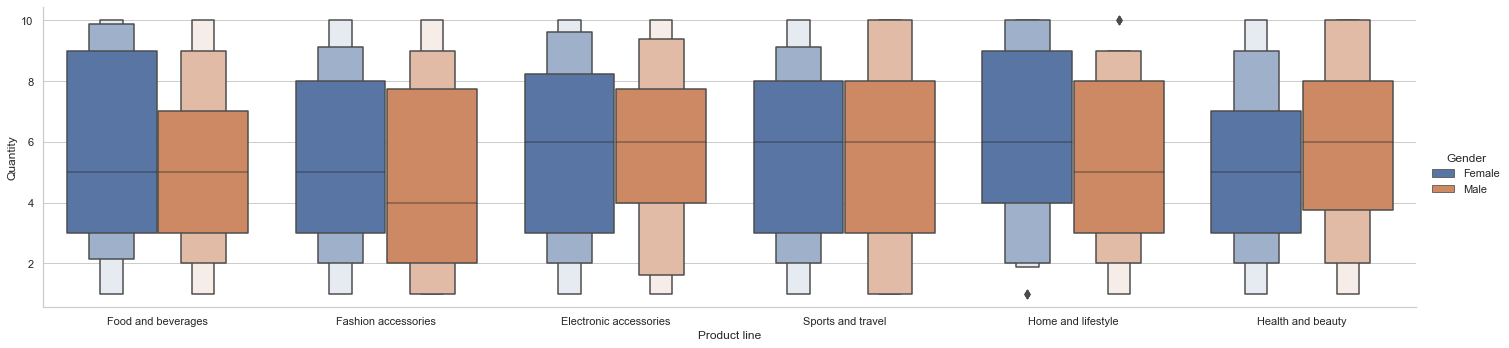

In [85]:
plt.figure(figsize = (30, 15))
sns.catplot('Product line', 'Quantity', data=Supermarkets_Data, hue='Gender', kind='boxen', aspect=4)
plt.show()

<Figure size 2160x1080 with 0 Axes>

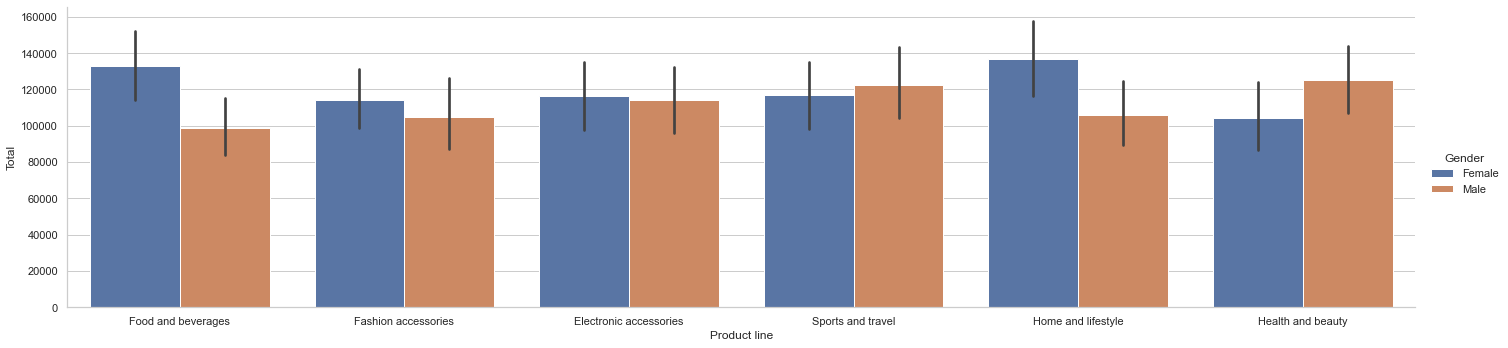

In [86]:
plt.figure(figsize = (30, 15))
sns.catplot('Product line', 'Total', data=Supermarkets_Data, hue='Gender', kind='bar', aspect=4)

plt.show()

### 6. Ratings

In [87]:
Supermarkets_Data['Rating'].describe()

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64

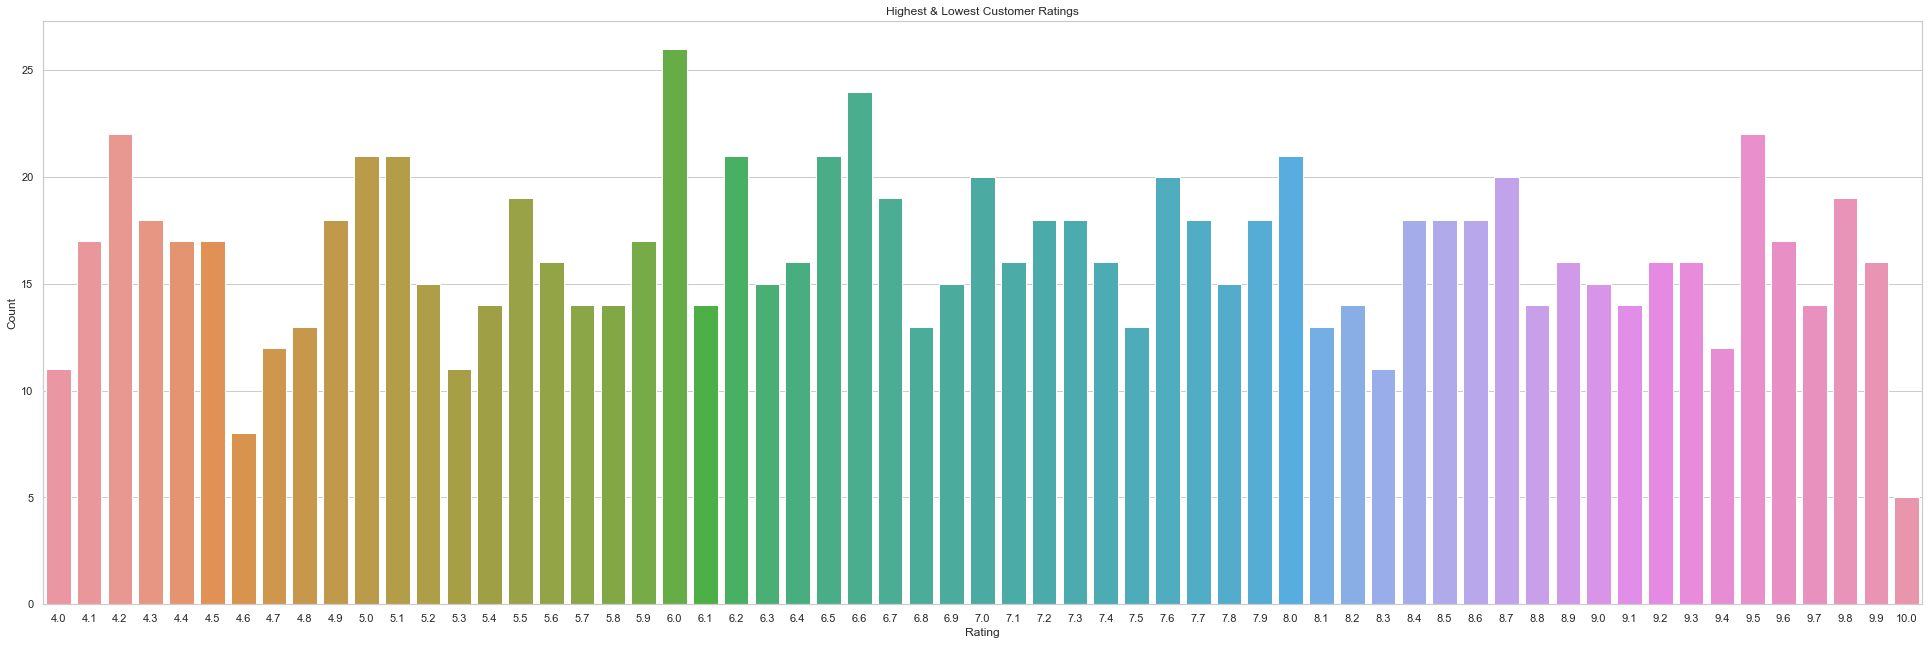

In [88]:
# Set the size of the plot
plt.figure(figsize=(30, 10)) 

# Create a countplot of the 'Rating' column
sns.countplot(x='Rating', data=Supermarkets_Data)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Highest & Lowest Customer Ratings')

# Show the plot
plt.show()


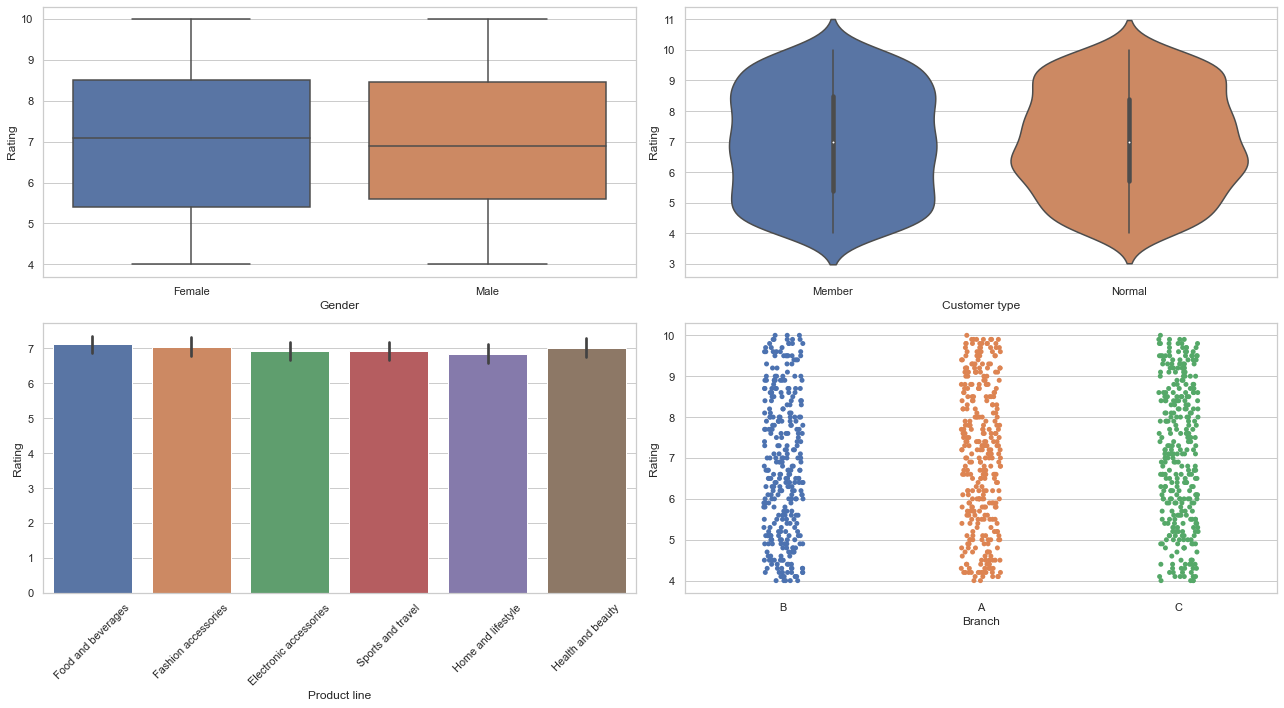

In [89]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create subplots to visualize the distributions
plt.figure(figsize=(18, 10))

# Distribution of Ratings by Gender
plt.subplot(2, 2, 1)
sns.boxplot(x='Gender', y='Rating', data=Supermarkets_Data)

# Distribution of Ratings by Member Type
plt.subplot(2, 2, 2)
sns.violinplot(x='Customer type', y='Rating', data=Supermarkets_Data)

# Distribution of Ratings by Product Line
plt.subplot(2, 2, 3)
sns.barplot(x='Product line', y='Rating', data=Supermarkets_Data)
plt.xticks(rotation=45)

# Distribution of Ratings by Branch
plt.subplot(2, 2, 4)
sns.stripplot(x='Branch', y='Rating', data=Supermarkets_Data)


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

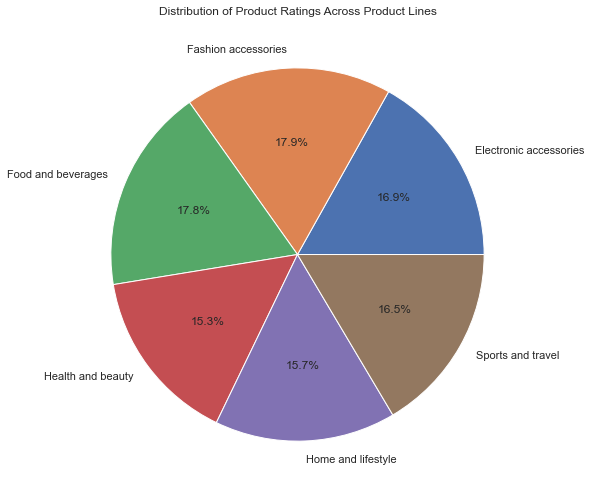

In [90]:
product_ratings = Supermarkets_Data.groupby('Product line')['Rating'].sum()

plt.figure(figsize=(16,8))
plt.pie(product_ratings, labels = product_ratings.index, autopct='%1.1f%%')
plt.title('Distribution of Product Ratings Across Product Lines')
plt.show()

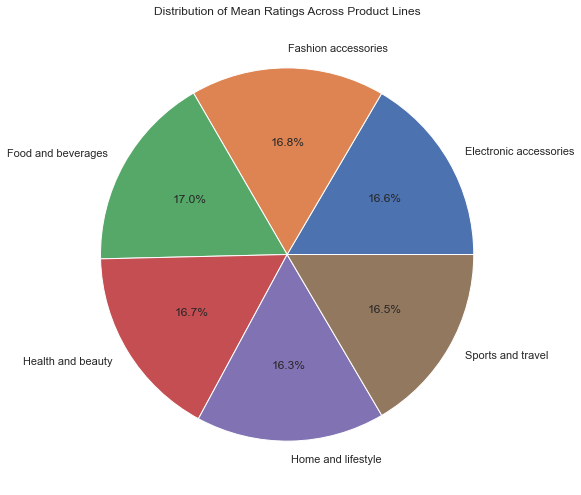

In [91]:
mean_ratings = Supermarkets_Data.groupby('Product line')['Rating'].mean()

plt.figure(figsize=(16,8))
plt.pie(mean_ratings, labels = mean_ratings.index, autopct='%1.1f%%')
plt.title('Distribution of Mean Ratings Across Product Lines')
plt.show()


In [92]:
highest_rating = Supermarkets_Data['Rating'].max()
highest_rated_items = Supermarkets_Data[Supermarkets_Data['Rating'] == highest_rating]

print(highest_rated_items)

      Invoice ID Branch           City Customer type  Gender  \
21   347-34-2234      B          Abuja        Member  Female   
48   423-57-2993      B          Abuja        Normal    Male   
279  866-70-2814      B          Abuja        Normal  Female   
466  725-56-0833      A          Lagos        Normal  Female   
687  285-68-5083      C  Port Harcourt        Member  Female   

               Product line  Unit price  Quantity    Tax 5%      Total  ...  \
21        Sports and travel     19825.2         9   8921.34  187348.14  ...   
48        Sports and travel     33620.4         6  10086.12  211808.52  ...   
279  Electronic accessories     19004.4        10   9502.20  199546.20  ...   
466       Health and beauty     11635.2        10   5817.60  122169.60  ...   
687       Sports and travel      8906.4         3   1335.96   28055.16  ...   

    Payment      cogs gross margin percentage  gross income  Rating  \
21     Epay  178426.8                4.761905       8921.34    10.0  

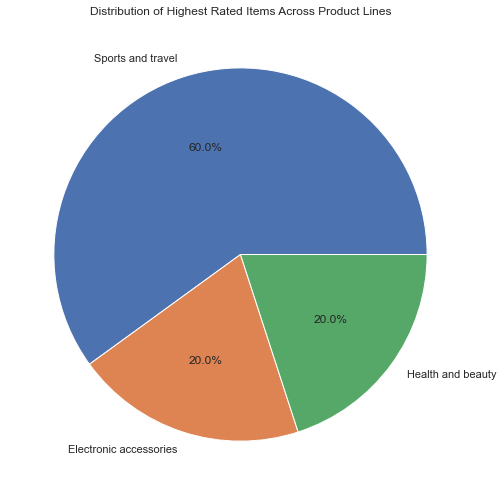

In [93]:
highest_rated_items_count = highest_rated_items['Product line'].value_counts()


plt.figure(figsize=(15,8))
plt.pie(highest_rated_items_count, labels = highest_rated_items_count.index, autopct='%1.1f%%')
plt.title('Distribution of Highest Rated Items Across Product Lines')
plt.show()


In [94]:
lowest_rating = Supermarkets_Data['Rating'].min()
lowest_rated_items = Supermarkets_Data[Supermarkets_Data['Rating'] == lowest_rating]

print(lowest_rated_items)


      Invoice ID Branch           City Customer type  Gender  \
24   510-95-6347      B          Abuja        Member  Female   
73   836-82-5858      B          Abuja        Member    Male   
99   730-61-8757      B          Abuja        Member    Male   
115  182-69-8360      B          Abuja        Normal  Female   
223  576-31-4774      B          Abuja        Normal  Female   
540  828-46-6863      A          Lagos        Member    Male   
594  651-96-5970      A          Lagos        Normal    Male   
701  730-50-9884      C  Port Harcourt        Normal  Female   
885  131-15-8856      C  Port Harcourt        Member  Female   
953  845-94-6841      C  Port Harcourt        Member  Female   
961  885-56-0389      C  Port Harcourt        Member    Male   

               Product line  Unit price  Quantity    Tax 5%      Total  ...  \
24       Food and beverages     17467.2         3   2620.08   55021.68  ...   
73        Health and beauty     24973.2         9  11237.94  235996.74  .

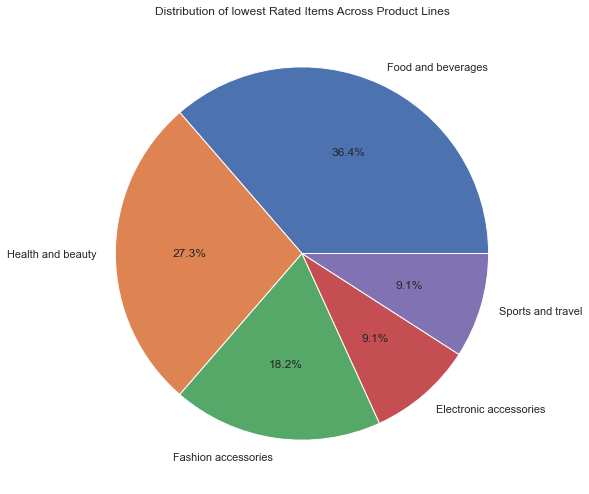

In [95]:
lowest_rated_items_count = lowest_rated_items['Product line'].value_counts()


plt.figure(figsize=(15,8))
plt.pie(lowest_rated_items_count, labels = lowest_rated_items_count.index, autopct='%1.1f%%')
plt.title('Distribution of lowest Rated Items Across Product Lines')
plt.show()

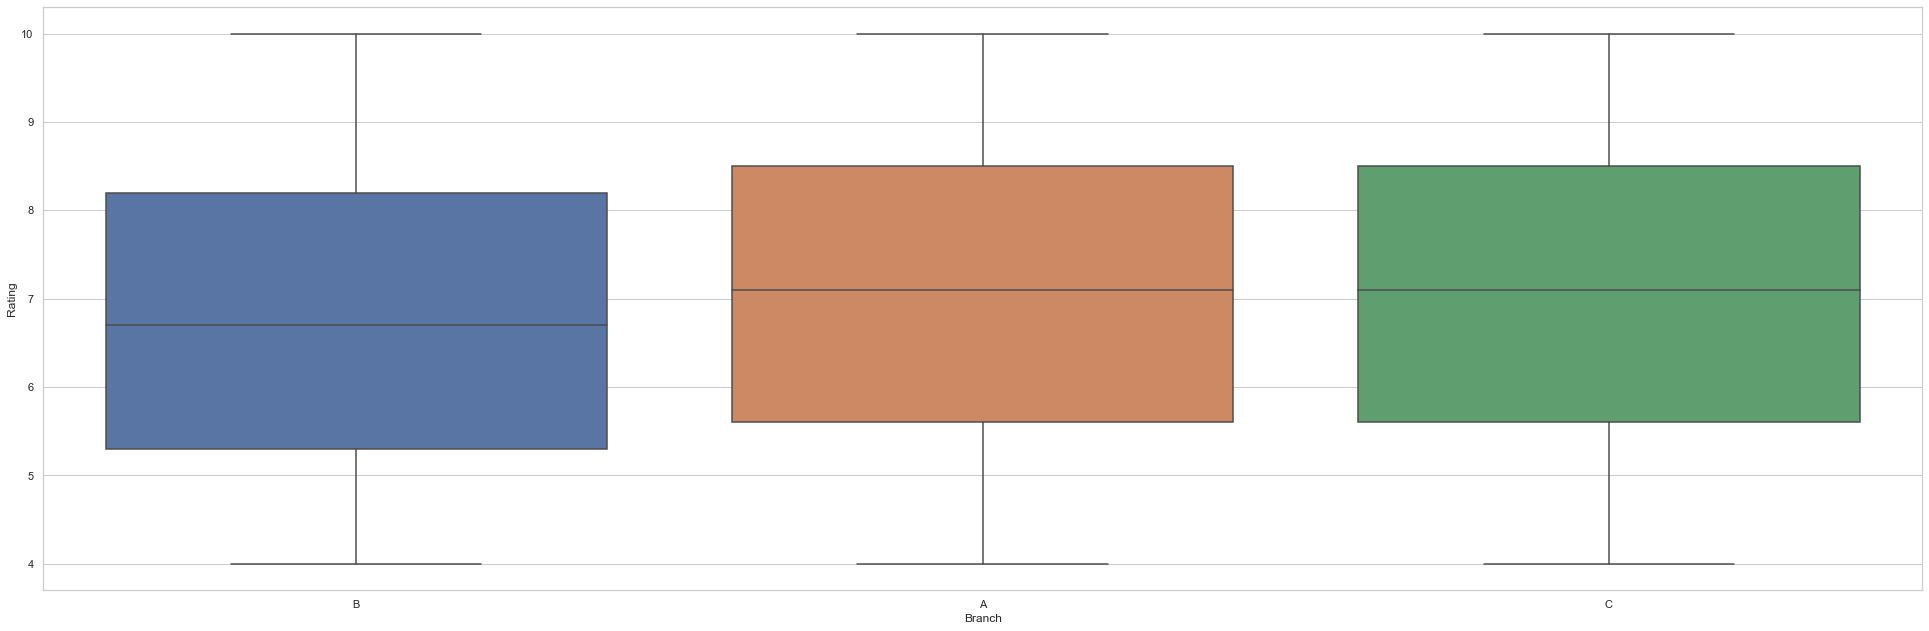

In [96]:
plt.figure(figsize=(30, 10)) 
sns.boxplot('Branch', 'Rating', data=Supermarkets_Data)
plt.show()

# Note the above.

60% of the highest rating point of 10 were from normal customers and 80% of them were female.

64% of the lowest ratings were from members and 55% were female.

# Insights

1. Using the .describe() function, it is easy to see the value differences for the various product resulted in a high standard deviation values.
2. There are no missing values in the dataframe.
3. Using unique values and count, I was able to establish that there are not much statistical difference in the members and normal customers that patronized the shops. That the payment methods are equally spread.
4. The branches varied in the product lines that sold the most. Lagos (Home and Lifestyle), Port harcourt (Food and Beverages) and Abuja (Sports and Travel). On the whole, Port Harcourt had more product lines in the top five of gross sales. Abuja performed poorly registering its highest selling product line in the number six position.
5. The highest grossing product line across all branches is the food and beverages product line.
6. Port Harcourt registered the highest gross income followed by Lagos and Abuja. However, Lagos sold more products overall.
7. Lagos and PortHarcourt recorded more sales in month one while Abuja sold more in month two.
8. The highest ratings were recorded in the Abuja branch and the highest rated items were in the sports and travel product line.
9. 6.0 was the rating given by highest number of customers while 10 was given by the least number of customers.


# Future Work

In the future I will like to have a breakdown of the product lines so as to find which individual products excelled and which ones did not. There is a need to include the stock inventory with the data so it will be easy to analyse if sales is affected by the inventory position.

# Standout Section

I looked closely at the data provided and discovered that there is not much statistical differences in most of the columns. However, it is important to note that upon review of the ratings section, something appears to be outstanding.
1. 60% of the highest rating point of 10 were from normal customers and 80% of them were female.
2. 64% of the lowest ratings were from members and 55% were female.
3. Observed that month one is the highest performing month for Branch A and C, while the Branch B excelled in month two.

The question arises, why are more members disatisfied with items purchased from the stores? And why are the normal shoppers happy with the items? Again why do some stores perform better in certain months. A study should be conducted to find out why this is so.

# Executive Summary.

The data provided shows that the stores and the locations are about per in sales performance and income earned. The questions asked will center on ways to improve the performance of each store. We would recommend that each store include addresses of the customers and inventory positions per day to help monitor if the sales of certain items were infuenced by the stock balances. I would also advice the store managers to send out questionnaires to the members with a view to identifying the grievances they have and address them positively. The happier the members are, the more references they will get. 